### LSE Data Analytics Online Career Accelerator

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand:
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV file(s) as reviews.
df = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
df.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [ ]:
# Any missing values?
df.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [ ]:
# Explore the data.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


(2000, 11)

In [ ]:
df.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

In [ ]:
# Basic descriptive statistics.
df.describe(include='all')

gender          age  remuneration (k£)  spending_score (1-100)  \
count     2000  2000.000000        2000.000000             2000.000000   
unique       2          NaN                NaN                     NaN   
top     Female          NaN                NaN                     NaN   
freq      1120          NaN                NaN                     NaN   
mean       NaN    39.495000          48.079060               50.000000   
std        NaN    13.573212          23.123984               26.094702   
min        NaN    17.000000          12.300000                1.000000   
25%        NaN    29.000000          30.340000               32.000000   
50%        NaN    38.000000          47.150000               50.000000   
75%        NaN    49.000000          63.960000               73.000000   
max        NaN    72.000000         112.340000               99.000000   

        loyalty_points education language platform       product   review  \
count      2000.000000      2000     2000     2000   2000.000000     2000   
unique             NaN         5        1        1           NaN     1980   
top                NaN  graduate       EN      Web           NaN  love it   
freq               NaN       900     2000     2000           NaN        5   
mean       1578.032000       NaN      NaN      NaN   4320.521500      NaN   
std        1283.239705       NaN      NaN      NaN   3148.938839      NaN   
min          25.000000       NaN      NaN      NaN    107.000000      NaN   
25%         772.000000       NaN      NaN      NaN   1589.250000      NaN   
50%        1276.000000       NaN      NaN      NaN   3624.000000      NaN   
75%        1751.250000       NaN      NaN      NaN   6654.000000      NaN   
max        6847.000000       NaN      NaN      NaN  11086.000000      NaN   

           summary  
count         2000  
unique        1432  
top     Five Stars  
freq           378  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

## 2. Drop columns

In [ ]:
# Drop unnecessary columns.
tr = df.copy() # tr is cleaned up turtle reviews data frame
tr = tr.drop(columns = ['language','platform'])
# View column names.
tr.info()
tr.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [ ]:
# Rename the column headers.
tr = tr.rename(columns = {'remuneration (k£)' : 'remuneration',
                          'spending_score (1-100)' : 'spend_score'})

# View column names.
tr.info()
tr.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spend_score     2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


Index(['gender', 'age', 'remuneration', 'spend_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [ ]:
# Create a CSV file as output.
tr.to_csv('turtle_reviews_clean.csv', index=False)

In [ ]:
# Import new CSV file with Pandas.
tr_clean = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
tr_clean.info()
tr_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spend_score     2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


gender  age  remuneration  spend_score  loyalty_points education  product  \
0    Male   18         12.30           39             210  graduate      453   
1    Male   23         12.30           81             524  graduate      466   
2  Female   22         13.12            6              40  graduate      254   
3  Female   25         13.12           77             562  graduate      263   
4  Female   33         13.94           40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [ ]:
tr_clean.corr(numeric_only = True)

age  remuneration  spend_score  loyalty_points   product
age             1.000000     -0.005708    -0.224334       -0.042445  0.003081
remuneration   -0.005708      1.000000     0.005612        0.616065  0.305309
spend_score    -0.224334      0.005612     1.000000        0.672310 -0.001649
loyalty_points -0.042445      0.616065     0.672310        1.000000  0.183600
product         0.003081      0.305309    -0.001649        0.183600  1.000000

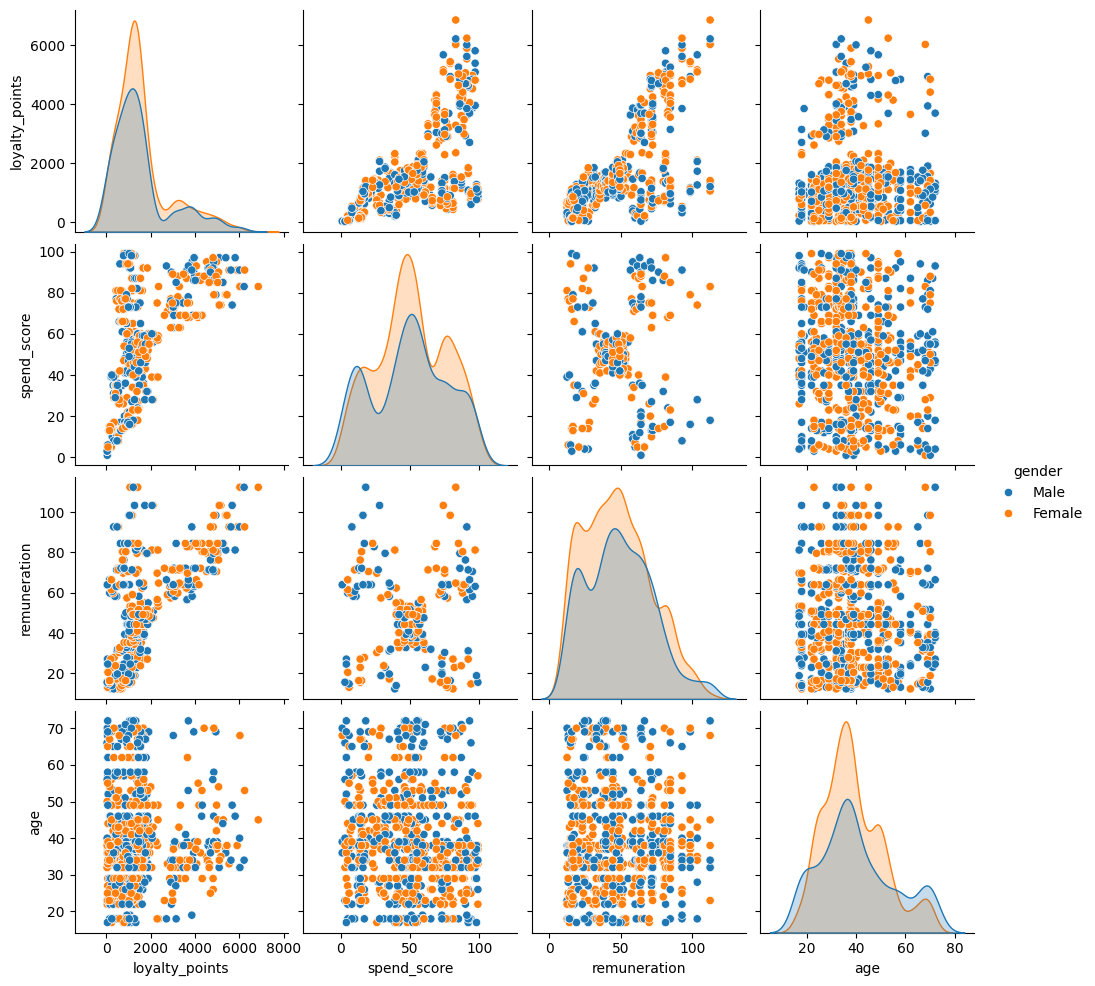

In [ ]:
sns.pairplot(tr_clean, vars= ['loyalty_points', 'spend_score', 'remuneration', 'age'], hue = 'gender')
plt.show()

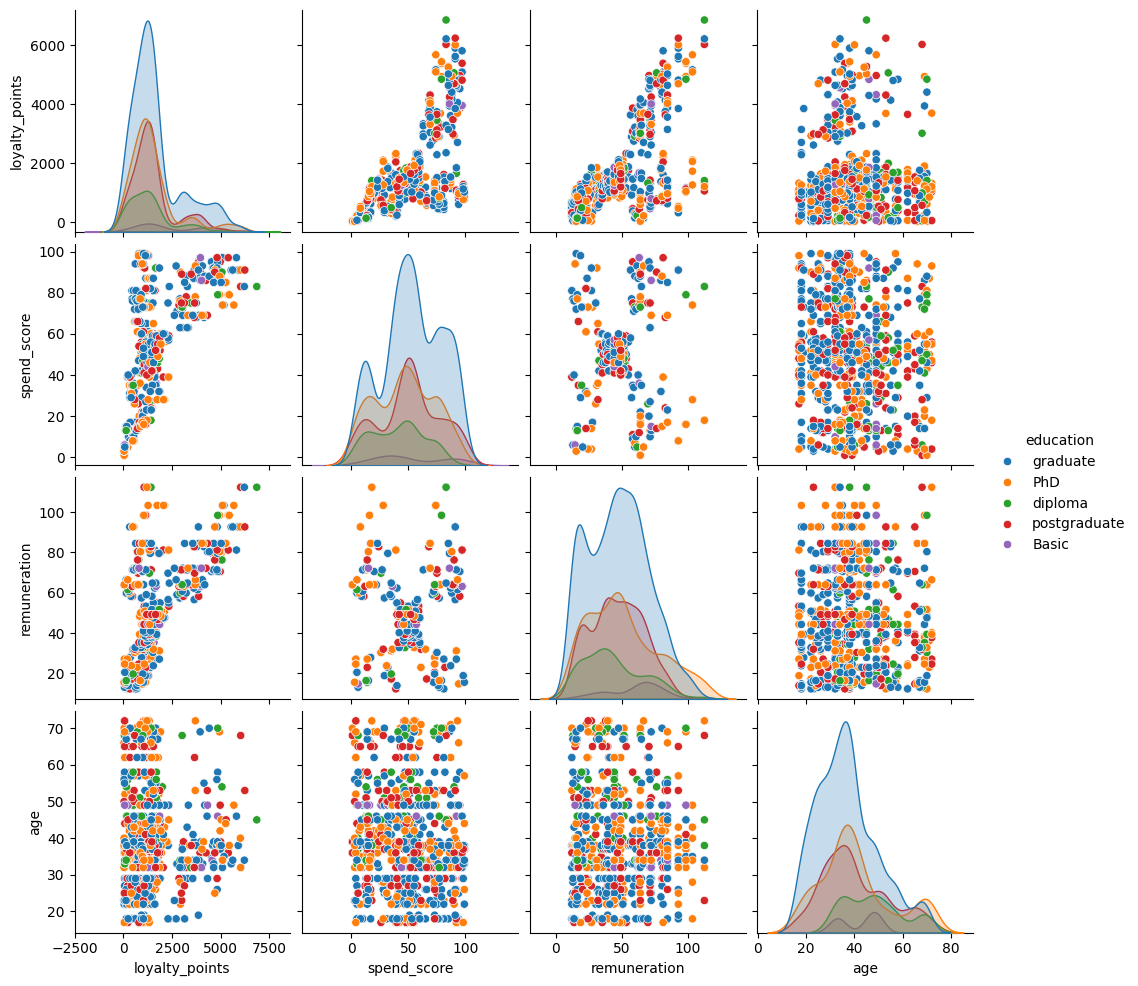

In [ ]:
sns.pairplot(tr_clean, vars= ['loyalty_points', 'spend_score', 'remuneration', 'age'], hue = 'education')
plt.show()

## 5. Simple Linear regression

### 5a) spending vs loyalty

In [ ]:
# Define independent variable.
x1 = tr_clean['spend_score'].values.reshape(-1,1)

# Define dependent variable.
y1 = tr_clean['loyalty_points'].values.reshape(-1,1)

# Create model and print summary of metrics.
lr1 = LinearRegression()
lr1.fit(x1,y1)

print("% R-squared value: ", round(lr1.score(x1, y1)*100,2))
print("Intercept value: ", round(lr1.intercept_.item(),2))
print("Coefficient value: ", round(lr1.coef_.item(),2))

% R-squared value:  45.2
Intercept value:  -75.05
Coefficient value:  33.06


In [ ]:
# Extract the estimated parameters.
# use OLS

# Extract the standard errors.
# use OLS

# Extract the predicted values.
y1_pred = lr1.predict(x1)
y1_pred

array([[1214.35337415],
       [2602.94449102],
       [ 123.31749662],
       ...,
       [2933.56142361],
       [ 453.93442921],
       [ 189.44088314]])

In [ ]:
# Set the X coefficient and the constant to generate the regression table.


# View the output.


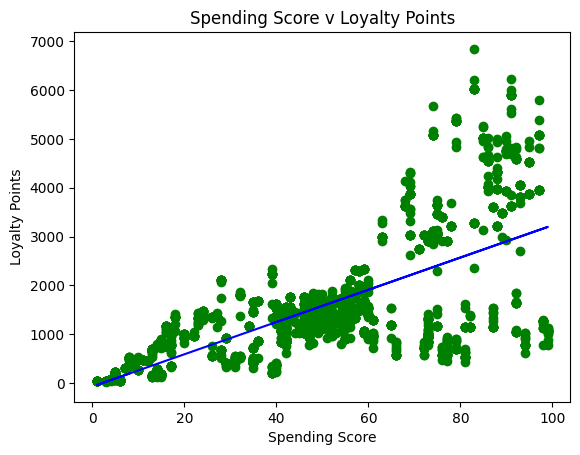

In [ ]:
# Plot the graph with a regression line.
plt.scatter(x1, y1, color = 'green')
plt.plot(x1, y1_pred, color = 'blue')
plt.title("Spending Score v Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

plt.show()

### 5b) renumeration vs loyalty

In [ ]:
# Define independent variable.
x2 = tr_clean['remuneration'].values.reshape(-1,1)

# Define dependent variable.
y2 = tr_clean['loyalty_points'].values.reshape(-1,1)

# Create model and print summary of metrics.
lr2 = LinearRegression()
lr2.fit(x2,y2)

print("% R-squared value: ", round(lr2.score(x2, y2)*100,2))
print("Intercept value: ", round(lr2.intercept_.item(),2))
print("Coefficient value: ", round(lr2.coef_.item(),2))

% R-squared value:  37.95
Intercept value:  -65.69
Coefficient value:  34.19


In [ ]:
# Extract the estimated parameters.
# use OLS

# Extract the standard errors.
# use OLS

# Extract the predicted values.
y2_pred = lr2.predict(x2)
y2_pred

array([[ 354.82374068],
       [ 354.82374068],
       [ 382.85775758],
       ...,
       [3102.15739671],
       [3298.39551499],
       [3102.15739671]])

In [ ]:
# Set the the X coefficient and the constant to generate the regression table.


# View the output.


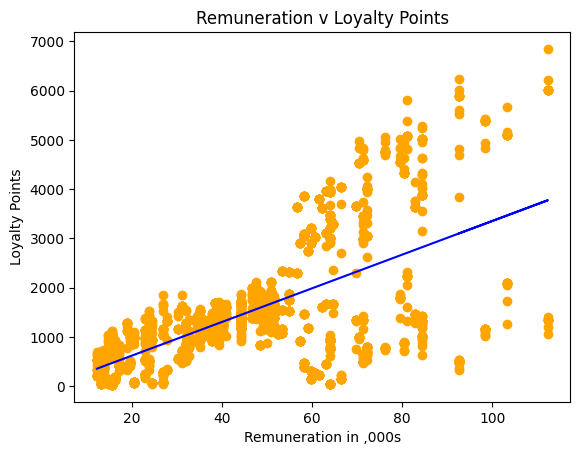

In [ ]:
# Plot graph with regression line.
plt.scatter(x2, y2, color = 'orange')
plt.plot(x2, y2_pred, color = 'blue')
plt.title("Remuneration v Loyalty Points")
plt.xlabel("Remuneration in ,000s")
plt.ylabel("Loyalty Points")

plt.show()

### 5c) age vs loyalty

In [ ]:
# Define independent variable.
x3 = tr_clean['age'].values.reshape(-1,1)

# Define dependent variable.
y3 = tr_clean['loyalty_points'].values.reshape(-1,1)

# Create model and print summary of metrics.
lr3 = LinearRegression()
lr3.fit(x3,y3)

print("% R-squared value: ", round(lr3.score(x3, y3)*100,2))
print("Intercept value: ", round(lr3.intercept_.item(),2))
print("Coefficient value: ", round(lr3.coef_.item(),2))

% R-squared value:  0.18
Intercept value:  1736.52
Coefficient value:  -4.01


In [ ]:
# Extract the estimated parameters.


# Extract the standard errors.


# Extract the predicted values.
y3_pred = lr3.predict(x3)
y3_pred

array([[1664.2872467 ],
       [1644.22322095],
       [1648.2360261 ],
       ...,
       [1600.0823643 ],
       [1600.0823643 ],
       [1608.1079746 ]])

In [ ]:
# Set the X coefficient and the constant to generate the regression table.


# View the output.


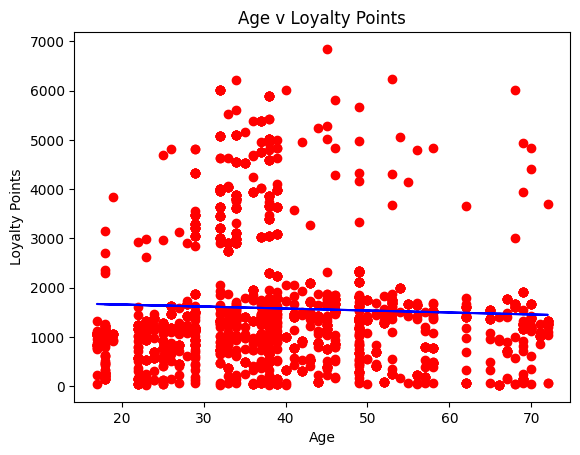

In [ ]:
# Plot graph with regression line.
plt.scatter(x3, y3, color = 'red')
plt.plot(x3, y3_pred, color = 'blue')
plt.title("Age v Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

plt.show()

## 6. Multiple Linear Regression and Statsmodel OLS

In [ ]:
# Define the dependent variable.
y = tr_clean['loyalty_points']

# Define the independent variable.
X = tr_clean[['spend_score', 'remuneration']]

In [ ]:
# Specify and fit the model X and y
mlr = LinearRegression()
mlr.fit(X,y)

LinearRegression()

In [ ]:
print('% R-square value for MLR :', round(mlr.score(X,y)*100,2))
print('Intercept value is :',round(mlr.intercept_.item(),2))
print("Coefficients:")
coeff_dict = dict(zip(X, mlr.coef_))
for i in X:
    print(i,':',round(coeff_dict[i],2))

% R-square value for MLR : 82.69
Intercept value is : -1700.31
Coefficients:
spend_score : 32.89
remuneration : 33.98


In [ ]:
# Adding Age as an independent variable to test the model
X1 = tr_clean[['spend_score', 'remuneration', 'age']]

In [ ]:
# Specify and fit the model X1 and y
mlr1 = LinearRegression()
mlr1.fit(X1,y)

LinearRegression()

In [ ]:
print('% R-square value for MLR :', round(mlr1.score(X1,y)*100,2))
print('Intercept value is :',round(mlr1.intercept_.item(),2))
print("Coefficients:")
coeff_dict1 = dict(zip(X1, mlr1.coef_))
for i in X1:
    print(i,':',round(coeff_dict1[i],2))

% R-square value for MLR : 83.99
Intercept value is : -2203.06
Coefficients:
spend_score : 34.18
remuneration : 34.01
age : 11.06


In [ ]:
# Predictive Model using OLS method for the whole data using Spend score and Remuneration as predictors
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     4770.
Date:                Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:29:23   Log-Likelihood:                -15398.
No. Observations:                2000   AIC:                         3.080e+04
Df Residuals:                    1997   BIC:                         3.082e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1700.3051     35.740    -47.575   

In [ ]:
# Predictive Model using OLS method for the whole data by adding Age to the list of predictors for comparison
model1 = sm.OLS(y, sm.add_constant(X1)).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:29:23   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2203.0598     52.361    -42.075   

In [ ]:
# Check multicollinearity.
X1_temp = sm.add_constant(X1)

# Create an empty DataFrame.
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(X1_temp.values,
                                               i) for i in range(X1_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = X1_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor      features
0        20.8         const
1         1.1   spend_score
2         1.0  remuneration
3         1.1           age


In [ ]:
# Checking how significant Age is and what is the p-value
model3 = sm.OLS(y3, sm.add_constant(x3)).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 30 Nov 2024   Prob (F-statistic):             0.0577
Time:                        17:29:23   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

## 7. Observations and insights

**Insights from Pairplots : There is a strong positive correlation of Loyalty Points with Spending Score and Remuneration. It does not seem to have much correlation with Age. There isn't a specific pattern or cluster attributable to either Gender or Education in the numeric variables so far**

1. **Spending score and Loyalty points** :
    - The linear regression model explains the variation in Loyalty points with change in Spending score for 45.2% of the data.
    - With increase in every point of Spending Score the Loyalty Points is expected to increase by 33.06 (Coeff).
    - The variance in actual versus predicted value of Loyalty points is huge causing the model to be unpredictable for higher Spending score (>60).
    - There could be a possibility of outliers for such higher Spending score that needs to be investigated further
    - **Insight #1** - Loyalty points could be explained by Spending score using Simple Linear Regression

2. **Remuneration and Loyalty points** :
    - The linear regression model explains the variation in Loyalty points with change in Remuneration for approx. 38% of the data.
    - With increase in every £1,000 of annual Remuneration the Loyalty Points is expected to increase by 34.19 (Coeff)
    - The variance in actual versus predicted value of Loyalty points is huge for higher Remuneration (>£60k annual income).
    - There could be a possibility of outliers for such higher Remuneration that needs to be investigated further
    -  **Insight #2** - Loyalty points could be explained by Remuneration using Simple Linear Regression


3. **Age and Loyalty points** :
    - The linear regression model explains the variation in Loyalty points with change in Age for 0.18% of the data.
    - With increase in every year of Age the Loyalty Points is expected to decrease by approx. 4 (Coeff)
    - The variance in actual versus predicted value of Loyalty points is huge all across the data.
    - There could be a possibility of outliers for such higher Remuneration that needs to be investigated further
    - **Insight #3** - Loyalty Points cannot be explained by Age using Simple Linear Regression model

4. **Multiple Linear Regression**:
    - **Insight #4** Having looked at the significance of independent variables, Spending score and Remuneration have significance to explain Loyalty points as R-square is approx. 83% with near zero p-value for both predictors.
    - The adjusted R-square value does not differ by much when Adding Age into the mix of independent variables.
    - The p-value of Age when fitted with Loyalty points is >0.05 indicating that the NULL Hypothesis cannot be rejected
    - **Insight #5** Age DOES NOT have a a significance to explain Loyalty points which is proven using MLR and OLS methods.
    - **Insight #6** There is NO multicollinearity observed between the independent variables Spending Score, Remuneration and Age

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree.
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame.
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library.
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.

Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [ ]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
import math

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [ ]:
# Create your new DataFrame.
df = pd.read_csv('turtle_reviews_clean.csv')

# Veiw the dataframe.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spend_score     2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


gender  age  remuneration  spend_score  loyalty_points education  product  \
0    Male   18         12.30           39             210  graduate      453   
1    Male   23         12.30           81             524  graduate      466   
2  Female   22         13.12            6              40  graduate      254   
3  Female   25         13.12           77             562  graduate      263   
4  Female   33         13.94           40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [ ]:
# Check the importance of the columns in the data
# Converting the categorical data columns - education and gender into dummy variables
var_list = ['gender', 'education']

# Specify what needs to apply to all the variables.
for var in var_list:
    # Specify details of the categorical list.
    cat_list = pd.get_dummies(df[var], prefix=var)
    # Indicate the joining of the DataFrames.
    df = df.join(cat_list)

df_fin = df.drop(var_list, axis=1)
df_fin.info()
df_fin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2000 non-null   int64  
 1   remuneration            2000 non-null   float64
 2   spend_score             2000 non-null   int64  
 3   loyalty_points          2000 non-null   int64  
 4   product                 2000 non-null   int64  
 5   review                  2000 non-null   object 
 6   summary                 2000 non-null   object 
 7   gender_Female           2000 non-null   bool   
 8   gender_Male             2000 non-null   bool   
 9   education_Basic         2000 non-null   bool   
 10  education_PhD           2000 non-null   bool   
 11  education_diploma       2000 non-null   bool   
 12  education_graduate      2000 non-null   bool   
 13  education_postgraduate  2000 non-null   bool   
dtypes: bool(7), float64(1), int64(4), object

age  remuneration  spend_score  loyalty_points  product  \
0   18         12.30           39             210      453   
1   23         12.30           81             524      466   
2   22         13.12            6              40      254   
3   25         13.12           77             562      263   
4   33         13.94           40             366      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Female  \
0  The fact that 50% of this space is wasted on a...          False   
1  Another worthless Dungeon Master's screen from...          False   
2                    pretty, but also pretty useless           True   
3                                         Five Stars           True   
4                                         Money trap           True   

   gender_Male  education_Basic  education_PhD  education_diploma  \
0         True            False          False              False   
1         True            False          False              False   
2        False            False          False              False   
3        False            False          False              False   
4        False            False          False              False   

   education_graduate  education_postgraduate  
0                True                   False  
1                True                   False  
2                True                   False  
3                True                   False  
4                True                   False

In [ ]:
# Converting columns which are boolean to integer
cols = df_fin.select_dtypes(include='bool').columns.tolist()
for i in cols:
    df_fin[i] = df_fin[i].astype(int)

# View the dataframe
df_fin.head()

age  remuneration  spend_score  loyalty_points  product  \
0   18         12.30           39             210      453   
1   23         12.30           81             524      466   
2   22         13.12            6              40      254   
3   25         13.12           77             562      263   
4   33         13.94           40             366      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Female  \
0  The fact that 50% of this space is wasted on a...              0   
1  Another worthless Dungeon Master's screen from...              0   
2                    pretty, but also pretty useless              1   
3                                         Five Stars              1   
4                                         Money trap              1   

   gender_Male  education_Basic  education_PhD  education_diploma  \
0            1                0              0                  0   
1            1                0              0                  0   
2            0                0              0                  0   
3            0                0              0                  0   
4            0                0              0                  0   

   education_graduate  education_postgraduate  
0                   1                       0  
1                   1                       0  
2                   1                       0  
3                   1                       0  
4                   1                       0

In [ ]:
# Select necessary columns whcih will act as Predictors or Independent Variables
# df['age'].value_counts() to check order of gender and education columns
nec_cols = ['remuneration', 'spend_score', 'age', 'gender_Female', 'gender_Male',
            'education_graduate', 'education_PhD', 'education_postgraduate',
            'education_diploma', 'education_Basic']

# nec_cols = ['age', 'remuneration', 'spend_score']

# Specify Dependent Variable.
dct_y = df_fin['loyalty_points']

# Specify Independent Variables.
dct_X = df_fin[nec_cols]

In [ ]:
# Review X and Y.
print(dct_X.info(),'\n')
dct_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   remuneration            2000 non-null   float64
 1   spend_score             2000 non-null   int64  
 2   age                     2000 non-null   int64  
 3   gender_Female           2000 non-null   int64  
 4   gender_Male             2000 non-null   int64  
 5   education_graduate      2000 non-null   int64  
 6   education_PhD           2000 non-null   int64  
 7   education_postgraduate  2000 non-null   int64  
 8   education_diploma       2000 non-null   int64  
 9   education_Basic         2000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 156.4 KB
None 

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: loyalty_points
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 1

## 2. Create train and test data sets.

In [ ]:
# Split the data training and testing 30/70.
dct_X_train, dct_X_test, dct_y_train, dct_y_test = train_test_split(dct_X, dct_y,
                                                   test_size=0.3, random_state=10)

In [ ]:
print(dct_X_train.info(),'\n')
dct_y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 1443 to 1289
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   remuneration            1400 non-null   float64
 1   spend_score             1400 non-null   int64  
 2   age                     1400 non-null   int64  
 3   gender_Female           1400 non-null   int64  
 4   gender_Male             1400 non-null   int64  
 5   education_graduate      1400 non-null   int64  
 6   education_PhD           1400 non-null   int64  
 7   education_postgraduate  1400 non-null   int64  
 8   education_diploma       1400 non-null   int64  
 9   education_Basic         1400 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 120.3 KB
None 

<class 'pandas.core.series.Series'>
Index: 1400 entries, 1443 to 1289
Series name: loyalty_points
Non-Null Count  Dtype
--------------  -----
1400 non-null   int64
dtypes: int64(1)
memory usage: 21.9 

## 3. Create Decision tree regressor

In [ ]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=10)

# Fit the regressor object to the data set.
regressor.fit(dct_X_train, dct_y_train)

DecisionTreeRegressor(random_state=10)

In [ ]:
# Evaluate the model.

# Predict the response for the train data.
dct_y_train_pred = regressor.predict(dct_X_train)

# Predict the response for the test data.
dct_y_pred = regressor.predict(dct_X_test)

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print('Mean Absolute Error: ', metrics.mean_absolute_error(dct_y_test, dct_y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(dct_y_test, dct_y_pred))

# Calculate the RMSE.
print('Root Mean Squared Error: ',
      math.sqrt(metrics.mean_squared_error(dct_y_test, dct_y_pred)))

# Calculate R2 score
print('R-square Score: ', metrics.r2_score(dct_y_test, dct_y_pred))

# Calculate the acccuracy score
print('Accuracy Score of Test Data: ', metrics.accuracy_score(dct_y_test, dct_y_pred))
print('Accuracy Score of Train Data: ', metrics.accuracy_score(dct_y_train, dct_y_train_pred))

Mean Absolute Error:  29.411666666666665
Mean Squared Error:  10947.648333333333
Root Mean Squared Error:  104.63101038092546
R-square Score:  0.9927415166361149
Accuracy Score of Test Data:  0.7033333333333334
Accuracy Score of Train Data:  1.0


In [ ]:
# Check the importance or significance of each feature (independent Variable) in predicting

# Access feature importances
importances = regressor.feature_importances_

# Create a Pandas Series for easy sorting
feature_importances = pd.Series(importances, index=nec_cols)

# Sort the Series in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Print the sorted Series
print(feature_importances_sorted)

spend_score               0.493862
remuneration              0.489286
age                       0.015651
gender_Male               0.000285
education_postgraduate    0.000251
education_diploma         0.000172
education_graduate        0.000171
gender_Female             0.000164
education_PhD             0.000135
education_Basic           0.000022
dtype: float64


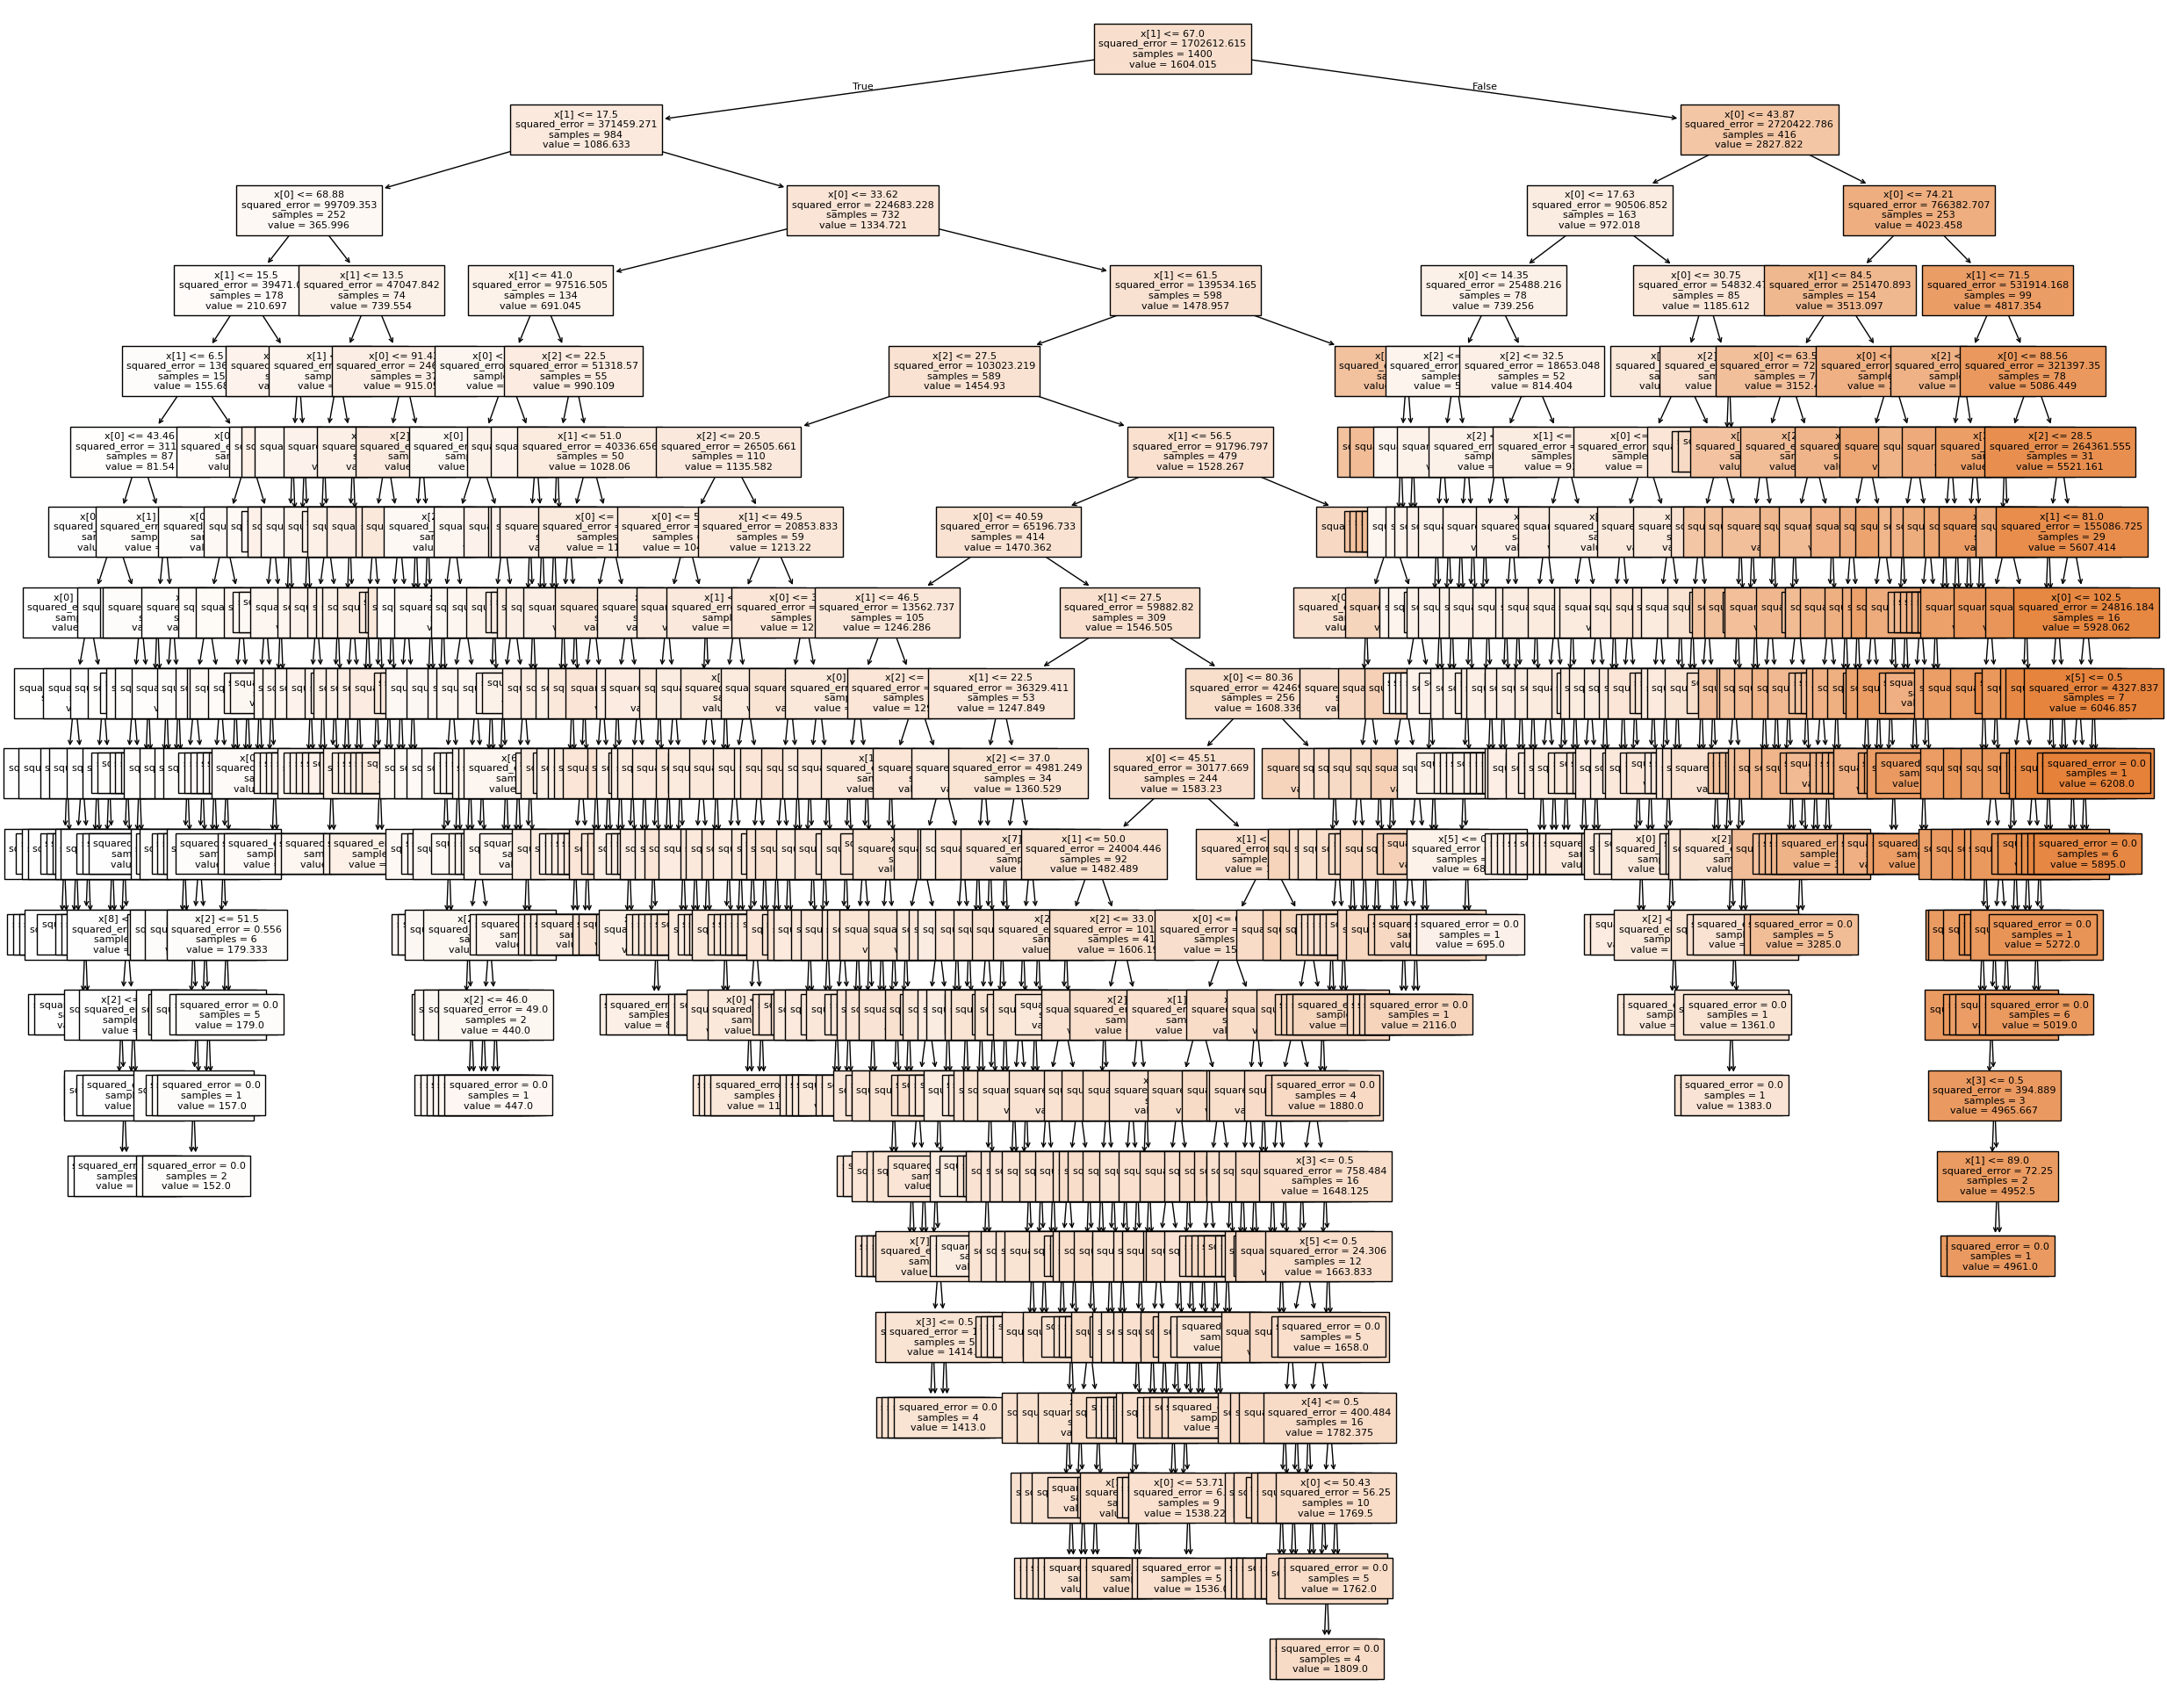

In [ ]:
# Plot the decision tree to create the visualisation.
fig, ax = plt.subplots(figsize=(30,25))
tree.plot_tree(regressor, fontsize=8, filled=True)
plt.savefig('dct_initial_plot.png', dpi=300, bbox_inches='tight')

# Print the plot with plt.show().
plt.show()

In [ ]:
# Print parameters Depeth and Leaves of the Decision Tree
print(f"Depth is {regressor.get_depth()}")
print(f"No. of Leaves are {regressor.get_n_leaves()}")

Depth is 20
No. of Leaves are 554


0     0.347613
1     0.809897
2     0.911174
3     0.940595
4     0.958052
5     0.966587
6     0.978147
7     0.983456
8     0.987405
9     0.988261
10    0.990162
11    0.990123
12    0.991942
13    0.992285
dtype: float64


<Axes: >

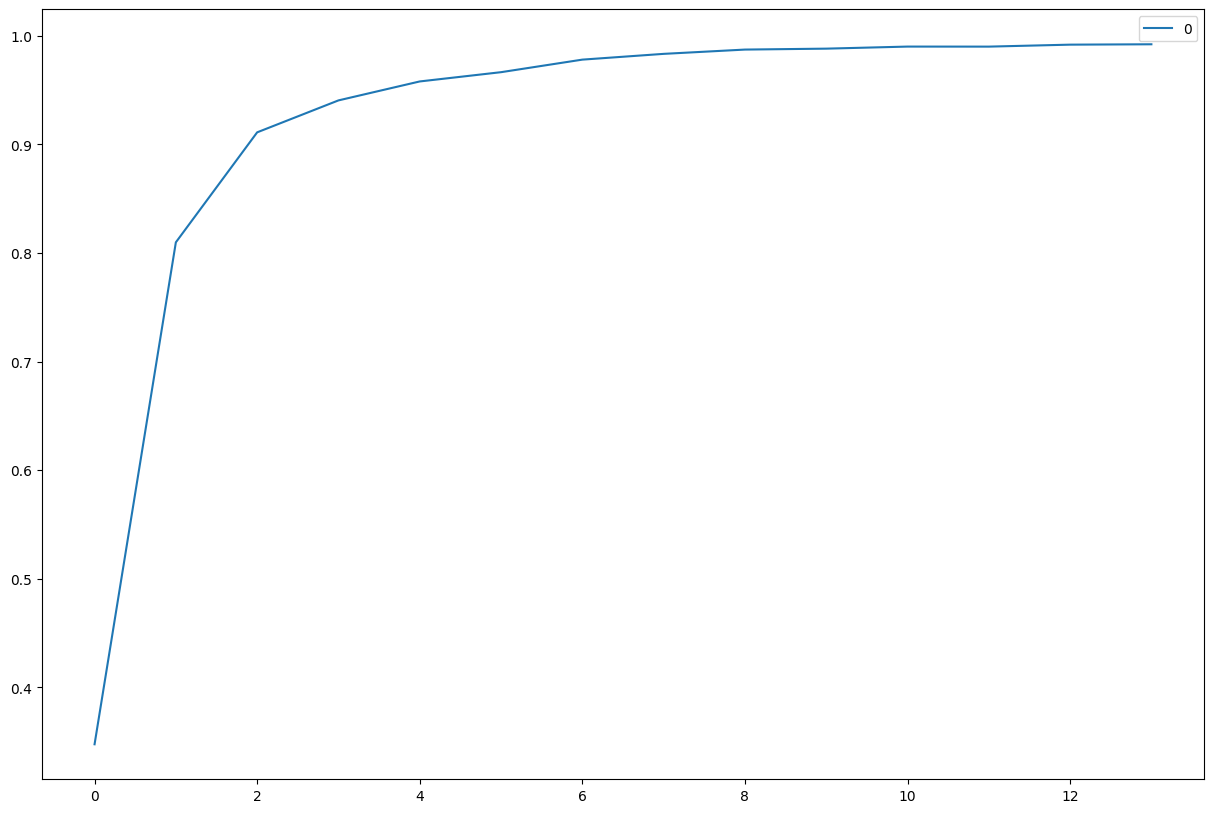

In [ ]:
# Check the correct pruning parameters (max_depth)
# List of values to try for max_depth:
depth_range_max = [i for i in range (1,15)]

# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in depth_range_max:
    dtrt = DecisionTreeRegressor(max_depth = depth, random_state = 10)
    dtrt.fit(dct_X_train, dct_y_train)
    score = dtrt.score(dct_X_test, dct_y_test)
    accuracy.append(score)

print(pd.Series(accuracy))

# Plot accuracy values across the range of depth values evaluated
accuracy = pd.DataFrame(accuracy)
accuracy.plot()

In [ ]:
# Prune the model.
# Using 10 based on the graph and accuracy score of 99+% from above

regressor_fin = DecisionTreeRegressor(max_depth=10, random_state=10)
regressor_fin.fit(dct_X_train, dct_y_train)
y_pred_fin = regressor_fin.predict(dct_X_test)

# Evaluate the model

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print('Mean Absolute Error: ', metrics.mean_absolute_error(dct_y_test, y_pred_fin))
print('Mean Squared Error: ', metrics.mean_squared_error(dct_y_test, y_pred_fin))

# Calculate the RMSE.
print('Root Mean Squared Error: ',
      math.sqrt(metrics.mean_squared_error(dct_y_test, y_pred_fin)))

# Calculate R2 score
print('R-square Score of Test Data: ', metrics.r2_score(dct_y_test, y_pred_fin))
print('R-square Score of Train Data: ', metrics.r2_score(dct_y_train, regressor_fin.predict(dct_X_train)))

Mean Absolute Error:  59.686816700468356
Mean Squared Error:  17705.441766574248
Root Mean Squared Error:  133.0617967959784
R-square Score of Test Data:  0.9882609807513074
R-square Score of Train Data:  0.9972274557995592


## 4. Fit and plot final model.

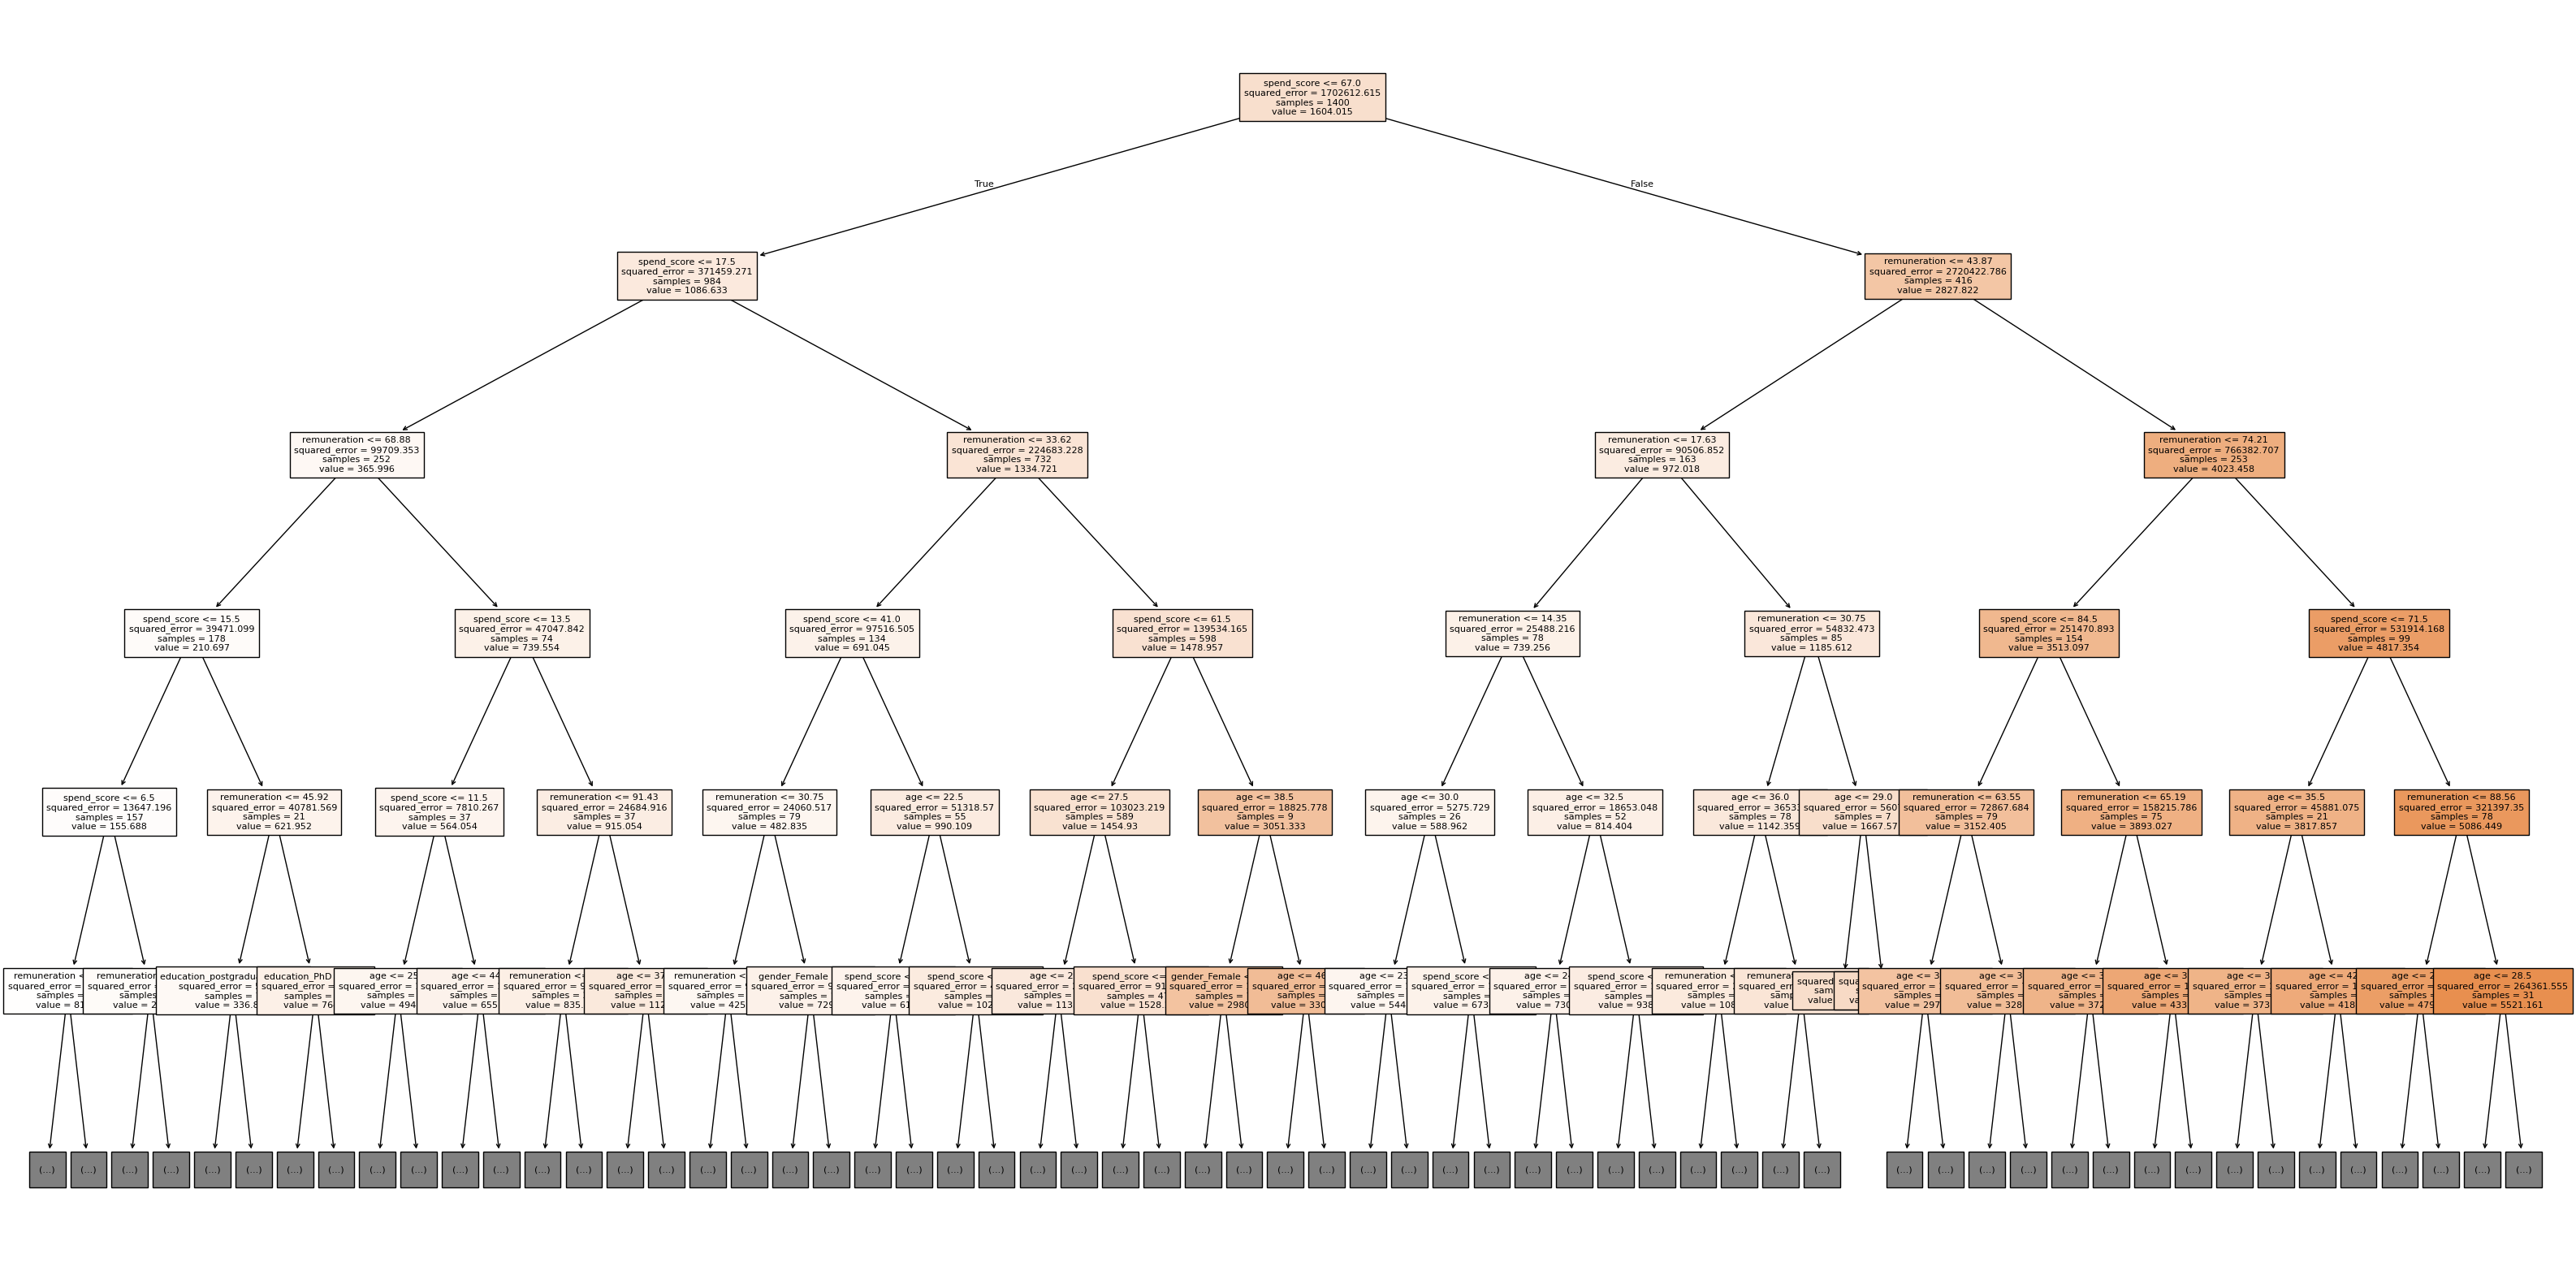

In [ ]:
# Fit and plot final model.
# Plot the decision tree to create the visualisation.
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(regressor_fin, max_depth=5, feature_names=nec_cols, fontsize=8, filled=True)
plt.savefig('dct_final_plot.png', dpi=300, bbox_inches='tight')

# Print the plot with plt.show().
plt.show()


In [ ]:
# Print parameters Depeth and Leaves of the Decision Tree
print(f"Depth is {regressor_fin.get_depth()}")
print(f"No. of Leaves are {regressor_fin.get_n_leaves()}")

Depth is 10
No. of Leaves are 332


## 5. Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Specify Dependent Variable.
rf_y = df_fin['loyalty_points']

# Specify Independent Variables.
rf_X = df_fin[nec_cols]

# Split the data training and testing 30/70.
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y,
                                                   test_size=0.3, random_state=10)
# Create a RandomForestRegressor object
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=10)

# Train the model on the training data
rf_model.fit(rf_X_train, rf_y_train)

RandomForestRegressor(max_depth=10, random_state=10)

In [ ]:
# Evaluate the model.

# Predict the response for the train data.
rf_y_train_pred = rf_model.predict(rf_X_train)

# Predict the response for the test data.
rf_y_pred = rf_model.predict(rf_X_test)

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print('Mean Absolute Error: ', metrics.mean_absolute_error(rf_y_test, rf_y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(rf_y_test, rf_y_pred))

# Calculate the RMSE.
print('Root Mean Squared Error: ',
      math.sqrt(metrics.mean_squared_error(rf_y_test, rf_y_pred)))

# Calculate the R2 score
print('R-square of Test Data: ', metrics.r2_score(rf_y_test, rf_y_pred))
print('R-square Score of Train Data: ', metrics.r2_score(rf_y_train, rf_y_train_pred))

# Calculate the acccuracy score
# print('Accuracy Score of Test Data: ', metrics.accuracy_score(rf_y_test, rf_y_pred))
# print('Accuracy Score of Train Data: ', metrics.accuracy_score(rf_y_train, rf_y_train_pred))

Mean Absolute Error:  39.36758994926598
Mean Squared Error:  6955.0705389638715
Root Mean Squared Error:  83.39706552969278
R-square of Test Data:  0.9953886659248995
R-square Score of Train Data:  0.9985907457515198


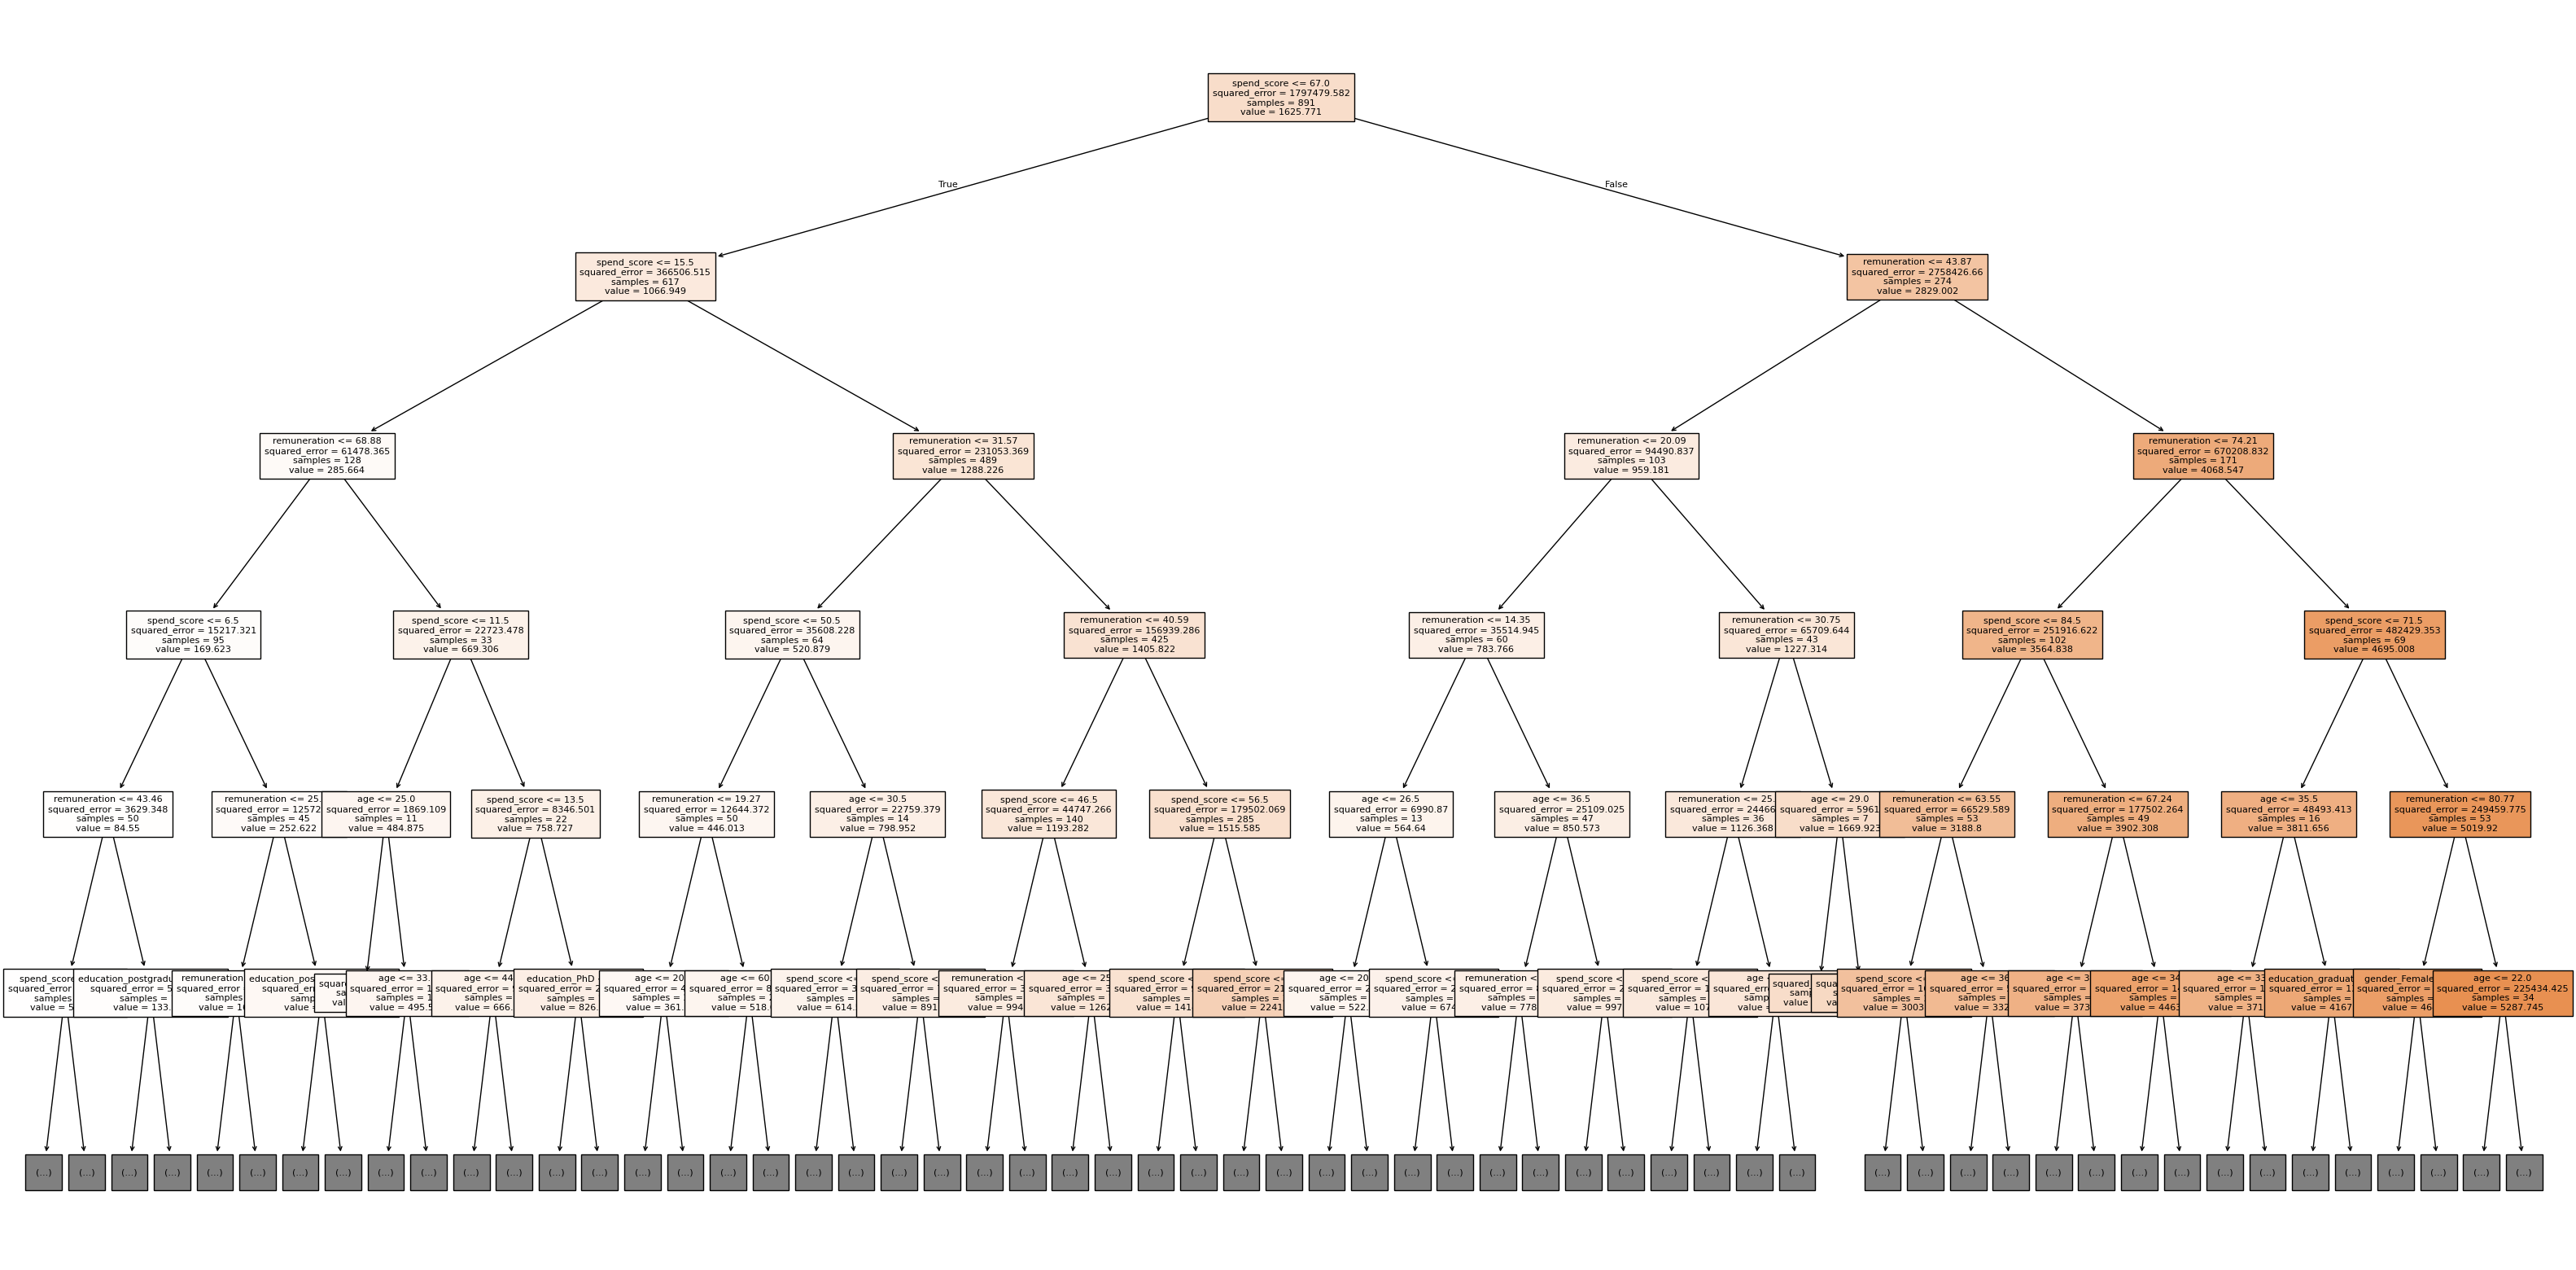

In [ ]:
# Plot the decision tree to create the visualisation.
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(rf_model.estimators_[0], max_depth=5, feature_names=nec_cols, fontsize=8, filled=True)
plt.savefig('rf_plot.png', dpi=300, bbox_inches='tight')

# Print the plot with plt.show().
plt.show()

In [ ]:
# Print parameters Depeth and Leaves of the Random Forest
print(f"Depth is {rf_model.estimators_[0].get_depth()}")
print(f"No. of Leaves are {rf_model.estimators_[0].get_n_leaves()}")

Depth is 10
No. of Leaves are 273


## 6. Discuss: Insights and observations

***Your observations here...***

**1. Model Types:**
rf_model: Random Forest Regressor. This is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and robustness.
regressor_fin: Decision Tree Regressor. This is a single decision tree that recursively splits the data based on features to make predictions.

**2. Performance Metrics:**
 - Both models were evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.
 - Looking at the Error Metrics: rf_model has lower MAE, MSE, and RMSE values than regressor_fin, suggesting that it makes more accurate predictions with smaller errors.
 - R2 score: rf_model shows a slightly higher R-squared value on both the test and train data, indicating that it explains a slightly greater proportion of the variance in the target variable (loyalty_points) compared to regressor_fin.
 - Complexity: Random Forest models are generally more complex and computationally intensive than single decision trees. However, they often provide better performance and generalization.

**3. Conclusion:**
Based on the metrics and observations, the Random Forest model (rf_model) appears to perform slightly better than the Decision Tree model (regressor_fin) in this case. It has a higher R-squared value and lower error metrics, indicating better predictive accuracy.

**Analytical Insights :**

**1. Spending Score is a Dominant Predictor**

* **Top-level split:** The root node of the tree uses `spending_score`, indicating it's the most important predictor for determining loyalty points in this specific tree. This suggests that `spending_score` has a strong influence on customer loyalty.
* **Frequent use in splits:**  `spending_score` appears frequently in the decision rules throughout the tree, further emphasizing its importance.

**2. Remuneration Plays a Secondary Role**

* **Second-level splits:** `remuneration` often appears in the second level of the tree, suggesting it's another important predictor, but its influence might be secondary to `spending_score`.
* **Interaction with spending score:** The tree seems to capture interactions between `spending_score` and `remuneration`. For example, in some branches, high `remuneration` leads to different predictions depending on the `spending_score`.

**3. Age Has Some Influence**

* **Appears deeper in the tree:** `age` shows up in some of the deeper nodes, indicating that it might have a less significant impact on loyalty points compared to `spending_score` and `remuneration`.
* **Potential interactions:**  There might be interactions between `age` and other predictors, but it's harder to see without analyzing more trees in the forest.

**Business Insights :**
1. **High Spending_score, Above average Remuneration, Higher Loyalty**: Customers with a spending score above 67 and Remuneration of more than £44k are predicted to have the highest loyalty points (more than 3000). This highlights the strong positive correlation between High spending behavior, above average remuneration and loyalty.
     - **Action 1**: Target these high-spending customers earning above average with exclusive rewards, personalized offers, and premium loyalty program benefits to further enhance their loyalty.

2. **Lower Spending, Lower Remuneration, Lower Loyalty**: Customers with lowest spending scores (below 15.5) and remuneration below £69k are predicted to have the lowest loyalty points (less than 300).
     - **Action 2**: Focus on strategies to encourage increased spending and engagement among this customer segment. Offer entry-level loyalty programs with attainable rewards and incentives to motivate them to climb the loyalty ladder.

3. **Prioritize Spending-Based Strategies**: Since Spending Score is at the root node, it's the most important predictor of loyalty in this hypothetical tree.
     - **Action 3**: Turtle Games should prioritize marketing strategies and loyalty program design that heavily emphasize spending behavior as the primary driver of loyalty.



#

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering.
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame.
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spend_score     2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


gender  age  remuneration  spend_score  loyalty_points education  product  \
0    Male   18         12.30           39             210  graduate      453   
1    Male   23         12.30           81             524  graduate      466   
2  Female   22         13.12            6              40  graduate      254   
3  Female   25         13.12           77             562  graduate      263   
4  Female   33         13.94           40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [ ]:
# Drop unnecessary columns.
df3 = df2[['remuneration', 'spend_score', 'loyalty_points']]

# View DataFrame.
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spend_score     2000 non-null   int64  
 2   loyalty_points  2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


remuneration  spend_score  loyalty_points
0         12.30           39             210
1         12.30           81             524
2         13.12            6              40
3         13.12           77             562
4         13.94           40             366

In [ ]:
# Explore the data.

# Check for any null values or missing data
df3.isna().sum()

remuneration      0
spend_score       0
loyalty_points    0
dtype: int64

In [ ]:
# Descriptive statistics.
df3.describe()

remuneration  spend_score  loyalty_points
count   2000.000000  2000.000000     2000.000000
mean      48.079060    50.000000     1578.032000
std       23.123984    26.094702     1283.239705
min       12.300000     1.000000       25.000000
25%       30.340000    32.000000      772.000000
50%       47.150000    50.000000     1276.000000
75%       63.960000    73.000000     1751.250000
max      112.340000    99.000000     6847.000000

## 2. Plot

<Axes: xlabel='spend_score', ylabel='remuneration'>

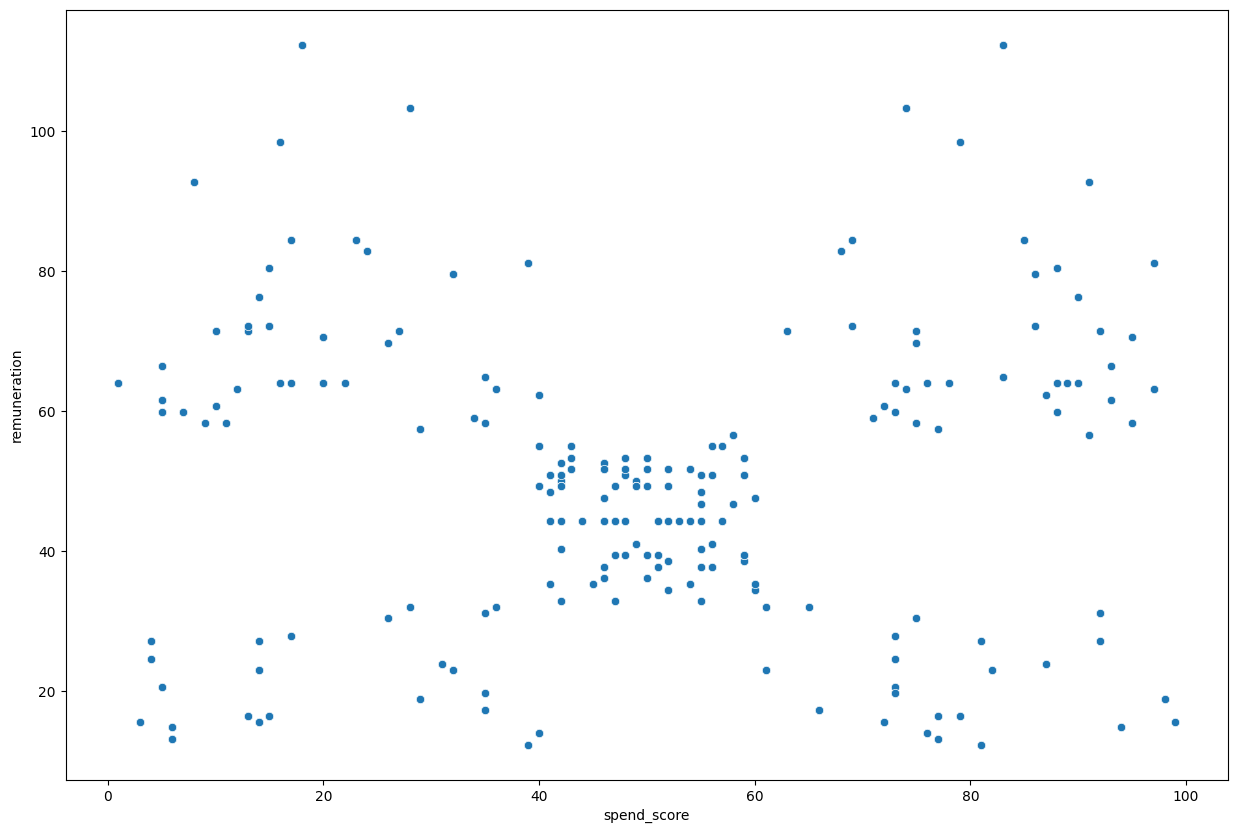

In [ ]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spend_score',
                y='remuneration',
                data=df3)

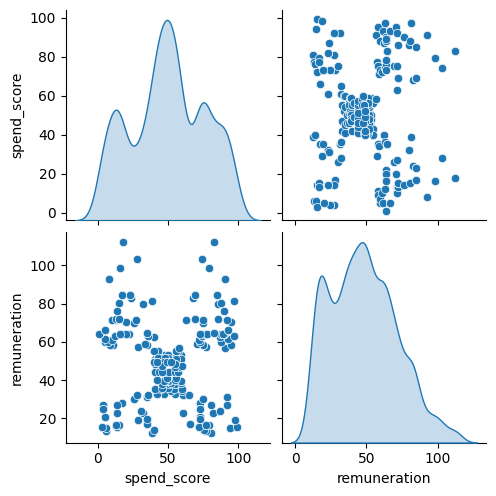

In [ ]:
# Create a pairplot with Seaborn.
var_x = ['spend_score', 'remuneration']
sns.pairplot(df3[var_x], diag_kind='kde')

## 3. Elbow and silhoutte methods

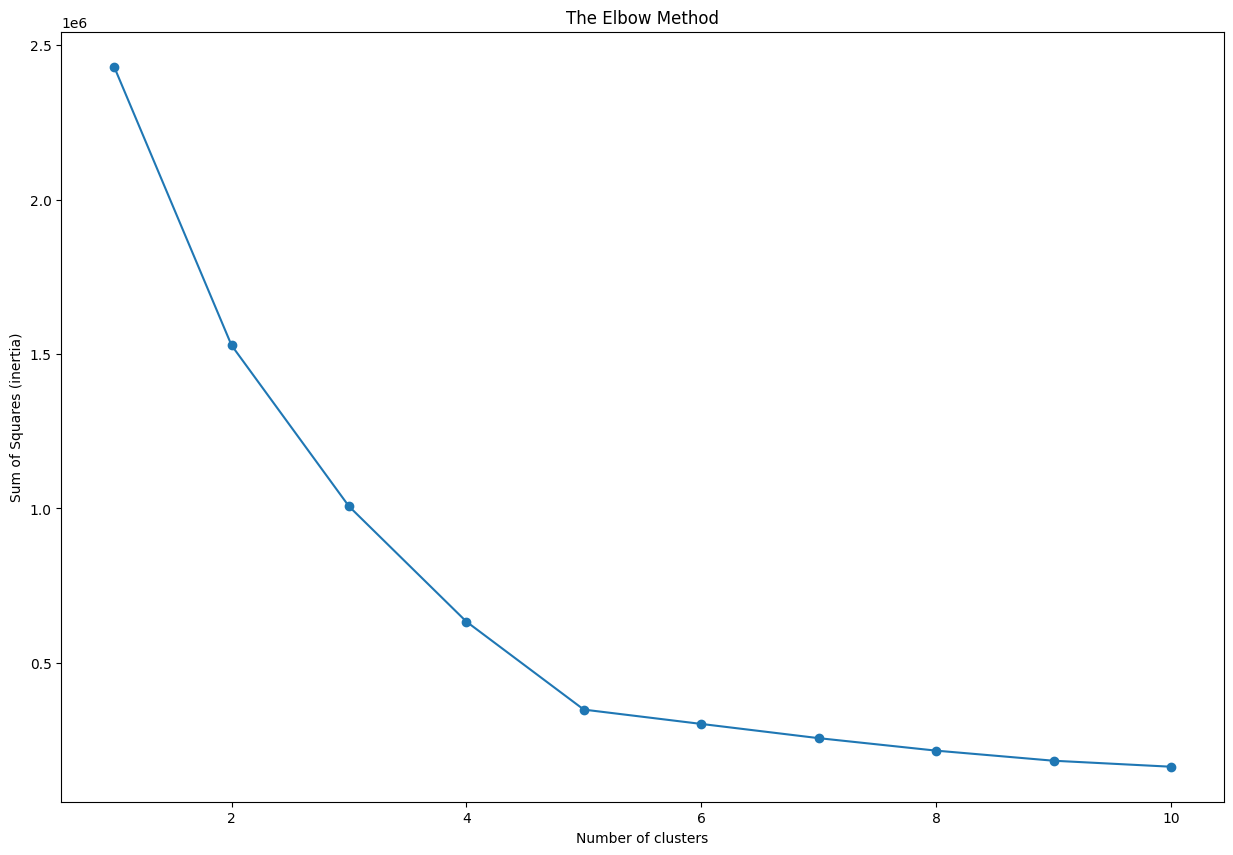

In [ ]:
# Determine the number of clusters: Elbow method.

# Elbow chart for us to decide on the number of optimal clusters.
ss = [] # Sum of Squares as inertia
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df3[var_x])
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squares (inertia)")
plt.show()

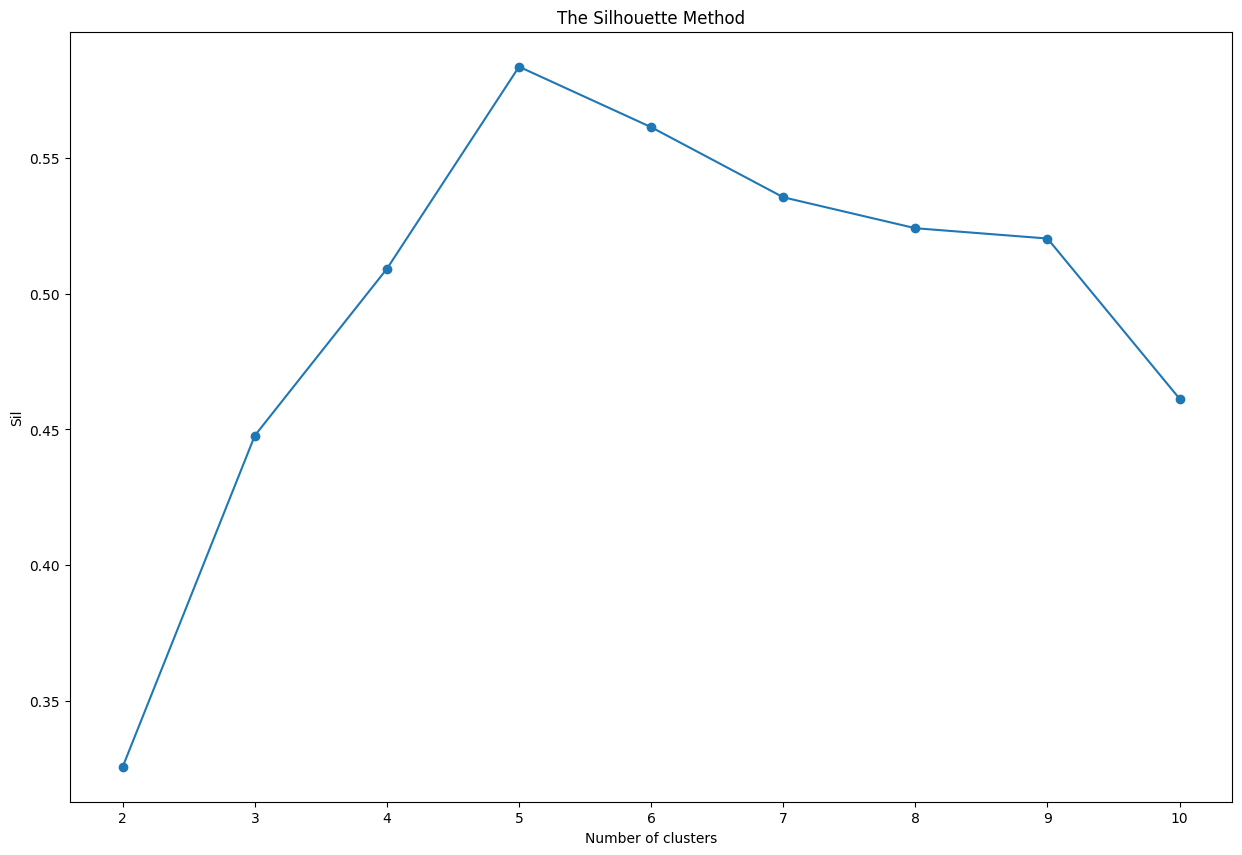

In [ ]:
# Determine the number of clusters: Silhouette method.

# Find the range of clusters to be used using silhouette method.
sil = [] # Silhouette score
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k, random_state=42).fit(df3[var_x])
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df3[var_x],
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

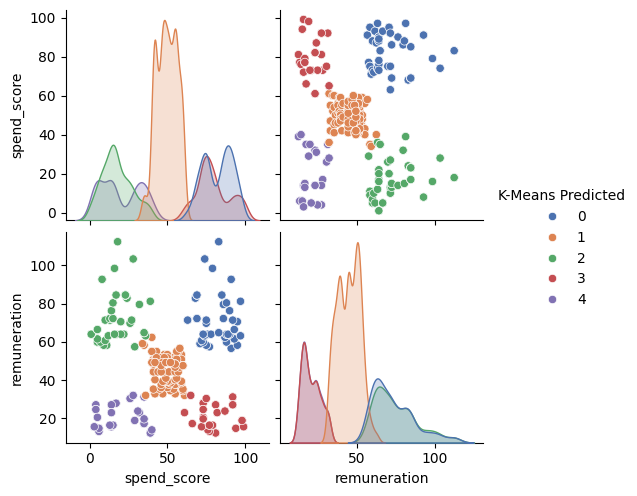

In [ ]:
# Using 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df3[var_x])

clusters = kmeans.labels_
df3['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(data = df3,
             vars = var_x,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette='deep')

In [ ]:
# Check the number of observations per predicted class.
df3['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

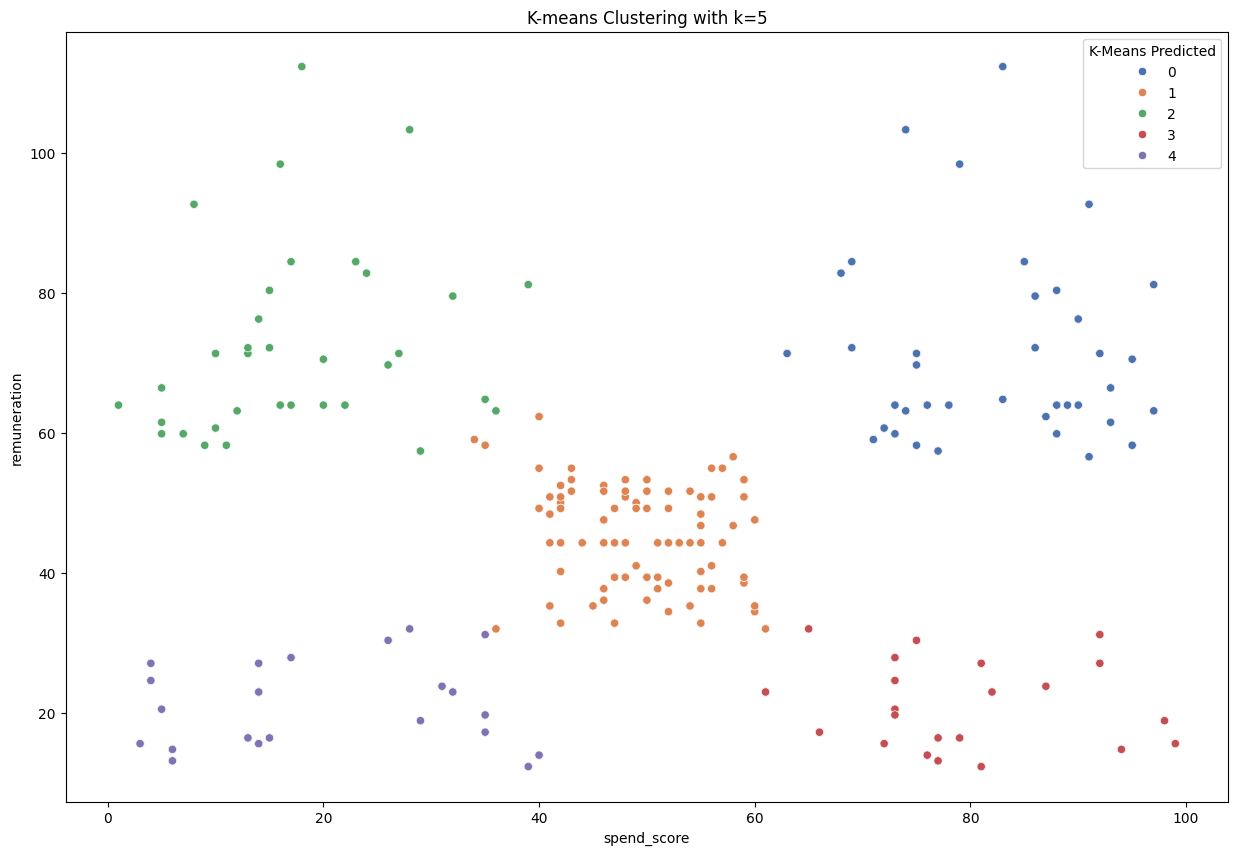

In [ ]:
# Visualising the clusters.
sns.scatterplot(x='spend_score' ,
                y ='remuneration',
                data=df3 ,
                hue='K-Means Predicted',
                palette='deep')
plt.title('K-means Clustering with k=5')
plt.show()

In [ ]:
# K-means clustering with k=6
kmeans_6 = KMeans(n_clusters=6,
                  max_iter=15000,
                  init='k-means++',
                  random_state=42).fit(df3[var_x])
clusters_6 = kmeans_6.labels_
df3['K-Means Predicted_6'] = clusters_6

# Check the number of observations per predicted class for k=6
print(df3['K-Means Predicted_6'].value_counts())

K-Means Predicted_6
1    774
2    330
4    271
3    269
0    238
5    118
Name: count, dtype: int64


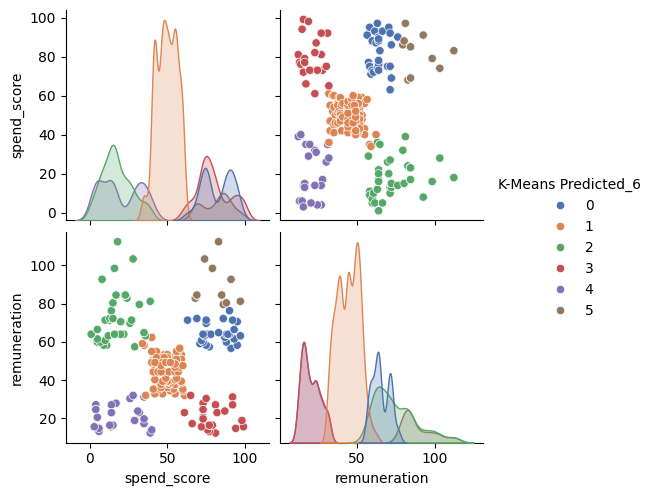

In [ ]:
# Plot the predicted clusters for k=6
sns.pairplot(data=df3,
             vars=var_x,
             hue='K-Means Predicted_6',
             diag_kind='kde',
             palette='deep')

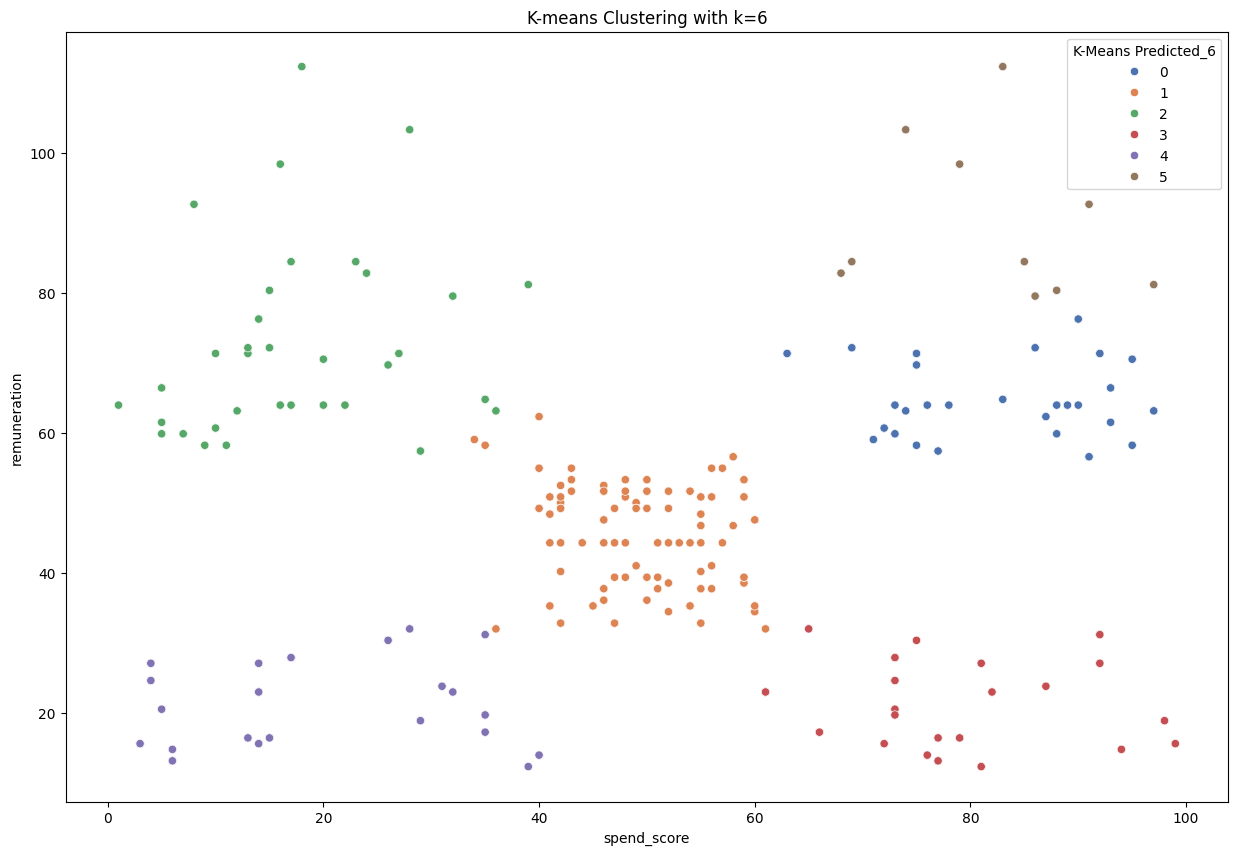

In [ ]:
# Visualize the clusters for k=6
sns.scatterplot(x='spend_score',
                y='remuneration',
                data=df3,
                hue='K-Means Predicted_6',
                palette='deep')
plt.title('K-means Clustering with k=6')
plt.show()

## 5. Fit final model and justify your choice

**Conclusion** - Cluster size = 5 looks better in terms of conslidation and spread of data across the plot

In [ ]:
# Apply the final model.
# Finally using cluster size = 5, Drop column for K-Means for k=6
df3 = df3.drop(['K-Means Predicted_6'], axis=1)
df3.head()

remuneration  spend_score  loyalty_points  K-Means Predicted
0         12.30           39             210                  4
1         12.30           81             524                  3
2         13.12            6              40                  4
3         13.12           77             562                  3
4         13.94           40             366                  4

In [ ]:
# Check the number of observations per predicted class.
df3['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

## 6. Plot and interpret the clusters

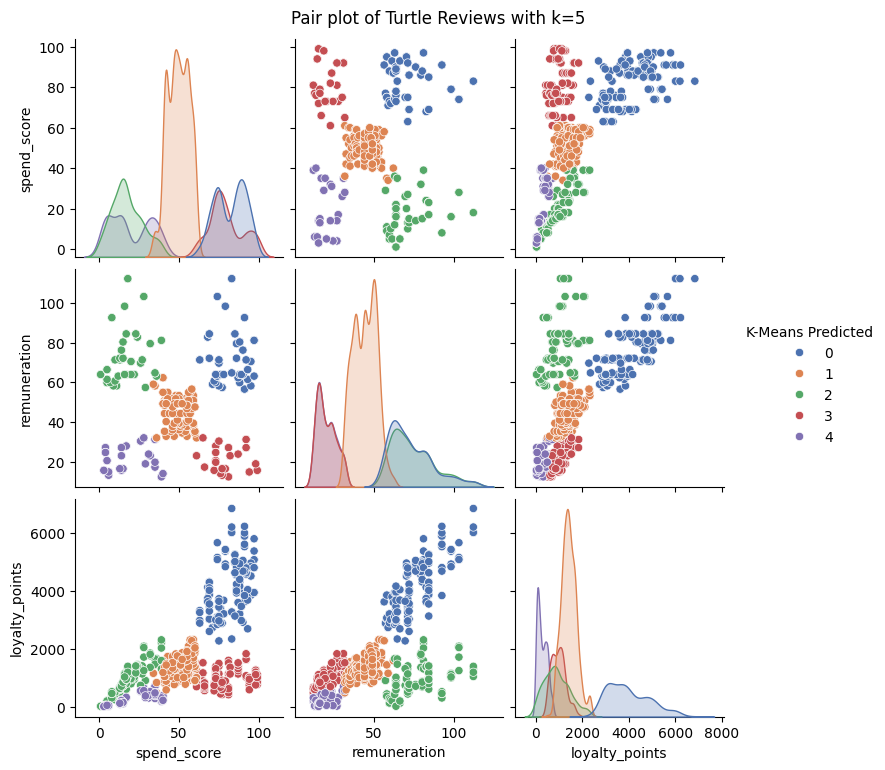

In [ ]:
# Visualising the clusters.
# Plot the predicted.
pp = sns.pairplot(data = df3,
                  vars = ['spend_score','remuneration','loyalty_points'],
                  hue='K-Means Predicted',
                  diag_kind= 'kde',
                  palette='deep')
pp.fig.suptitle('Pair plot of Turtle Reviews with k=5', y=1.02)
plt.savefig('Pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

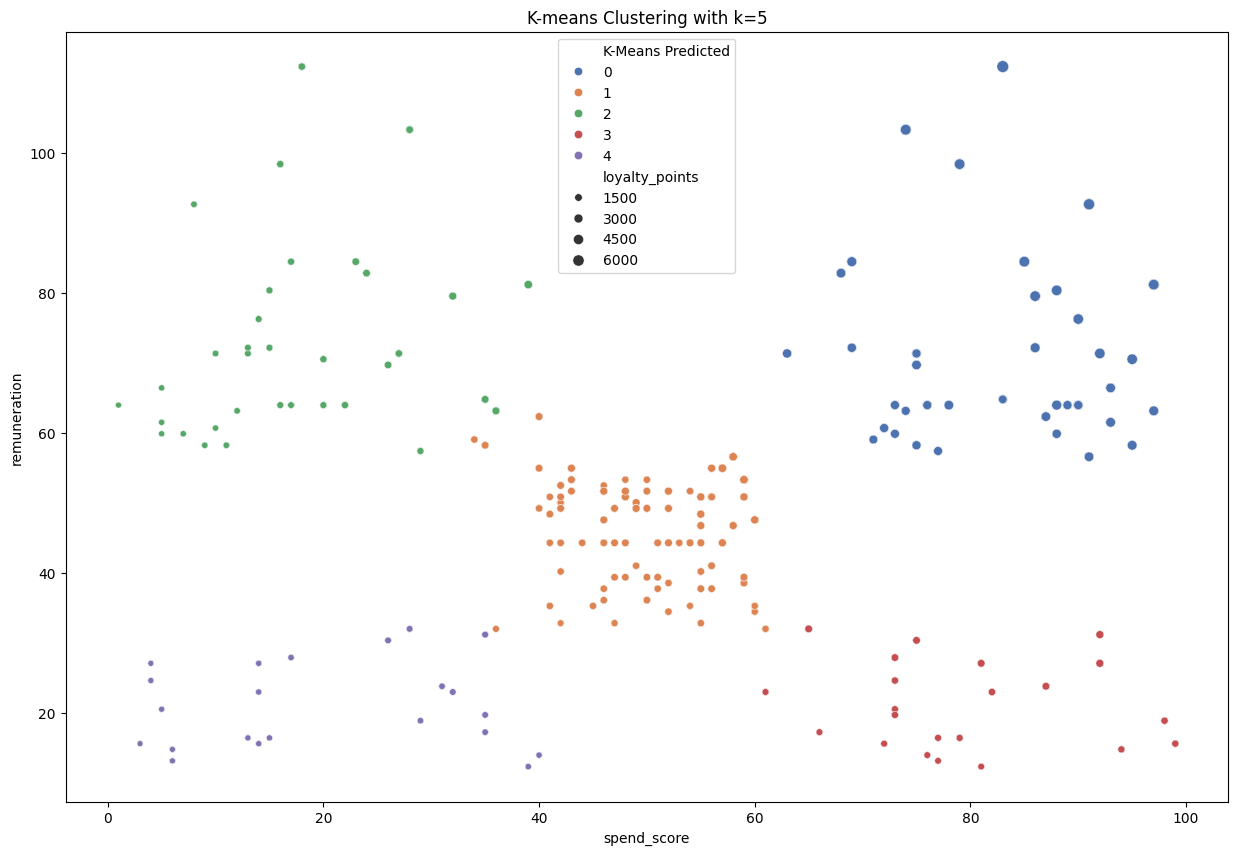

In [ ]:
# Visualising the clusters.
sns.scatterplot(x='spend_score' ,
                y ='remuneration',
                data=df3,
                hue='K-Means Predicted',
                size='loyalty_points',
                palette='deep')
plt.title('K-means Clustering with k=5')
plt.legend(loc='best')
plt.savefig('KMeans_plot.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Categorising the Customers
It will be based on the following features -

1.   Spending Score
2.   Remuneration (Annual Income)



In [ ]:
# Descriptive statistics for each cluster
for cluster_num in range(5):  # Iterate through each cluster
    cluster_data = df3[df3['K-Means Predicted'] == cluster_num]
    print(f"\nDescriptive Statistics for Cluster {cluster_num}:")
    print(cluster_data.describe())


Descriptive Statistics for Cluster 0:
       remuneration  spend_score  loyalty_points  K-Means Predicted
count    356.000000   356.000000      356.000000              356.0
mean      73.240281    82.008427     3988.238764                0.0
std       13.557856     9.342765      898.409322                0.0
min       56.580000    63.000000     2289.000000                0.0
25%       63.140000    74.000000     3218.000000                0.0
50%       71.340000    83.000000     3866.000000                0.0
75%       81.180000    90.000000     4635.000000                0.0
max      112.340000    97.000000     6847.000000                0.0

Descriptive Statistics for Cluster 1:
       remuneration  spend_score  loyalty_points  K-Means Predicted
count    774.000000   774.000000      774.000000              774.0
mean      44.418786    49.529716     1420.382429                1.0
std        7.088279     6.484414      322.530608                0.0
min       31.980000    34.000000      

## 8. Discuss: Insights and observations

***Your observations here...***
1. Cluster 0 (count of 356) consists of customers with High Spending Score (Min. of 63 to a Max. of 97 with an Average of 82) and High Annual Income (£57k to £112k with an Average of £73k). This cluster has accumulated the Highest Range of Loyalty points (2289 to 6847 with an Average of 3988). Marketing campaigns are needed to sustain and retain loyalty of these customers by upselling Premium products or luxury segment for High Income group

2. Cluster 1 (count of 774) consists of customers with Moderate Spending Score (34 to 61 with an Average of 49.5) and Moderate Annual Income (£32k to £62k with an Average of £44k). This cluster has accumulated Middle Range of Loyalty points (504 to 2332 with an Average of 1420). Marketing campaigns are needed to encourage them to increase their loyalty points by cross selling more products which provide best value for money for Middle Income group using Bundles and offers

3. Cluster 2 (count of 330) consists of customers with Low Spending Score (1 to 39 with an Average of 17) but High Annual Income (£57k to £112k with an Average of £74k). This cluster has accumulated Lower Range of Loyalty points (40 to 2325 with an Average of 912). Further investigation is needed on why their Spending Scores are Low despite falling in the High Income group and how do they compare to Cluster 0? Marketing campaigns might be needed to encourage them to increase their loyalty points by upselling Premium products or luxury segment for High Income group and cross selling more products which provide better value for money using Bundles and offers

4. Cluster 3 (count of 269) consists of customers with High Spending Score (61 to 99 with an Average of 79) but Low Annual Income (£12k to £32k with an Average of £20k). This cluster has accumulated Lower Range of Loyalty points (436 to 1851 with an Average of 972). Further investigation is needed on why their Spending Scores are High despite falling in the Low Income group? Marketing campaigns might be needed to encourage them to retain and sustain their loyalty points by upselling and cross selling more products which provide best value for money. "Create more price sensitive and seasonal campaigns which create FOMO amongst them"

4. Cluster 4 (count of 271) consists of customers with Low Spending Score (3 to 40 with an Average of 20) and Low Annual Income (£12k to £32k with an Average of £20k). This cluster has accumulated Lowest Range of Loyalty points (25 to 726 with an Average of 275). Further investigation is needed on why their Spending Scores are lower to the group in Cluster 3 despite falling in the same Income group? Marketing campaigns might be needed to encourage them to increase their loyalty points by upselling and cross selling more products which provide best value for money.

**Insights and Conclusions** -
The groups to target different types of marketing campaigns are as follows -
1. Group 1 with Highest Avg of Loyalty Points (Cluster 0, cnt=356) - High Spend (61 and above) and High Income (£61k and above). Marketing effort to retain and sustain their Loyalty

2. Group 2 with Moderate Avg. of Loyalty Points (Cluster 1, cnt=774) - Moderate Spend (31-60) and Middle Income (£31k-£60k). Marketing effort to marginally increase their Loyalty

3. Group 3 with Modest Avg. of Loyalty Points (Cluster 2, cnt=330) - Low Spend (30 and below) but High Income (£60k and above). Needs further investigation and Marketing effort to substantially improve their Loyalty inline with Group 1

4. Group 4 with Modest Avg. of Loyalty Points (Cluster 3, cnt=269) - High Spend (61 and above) but Low Income (£30k and below). Marketing effort to retain and sustain their Loyalty

5. Group 5 with Lowest Avg. of Loyalty Points (Cluster 4, cnt=271)- Low Spend (30 and below) and Low Income (£30k and below). Needs further investigation and Marketing effort to substantially improve their Loyalty inline with Group 4

Maps to table in the technical report - Spend Group, Income Group, Loyalty Points Range and Suggested Marketing Campaign Strategy along with Further Investigations

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data.
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.probability import FreqDist

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

!pip install WordCloud
from wordcloud import WordCloud

!pip install textblob
from textblob import TextBlob


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Load the data set as df4
df4 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df4.head()

gender  age  remuneration  spend_score  loyalty_points education  product  \
0    Male   18         12.30           39             210  graduate      453   
1    Male   23         12.30           81             524  graduate      466   
2  Female   22         13.12            6              40  graduate      254   
3  Female   25         13.12           77             562  graduate      263   
4  Female   33         13.94           40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [ ]:
# Explore data set.
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spend_score     2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [ ]:
# Keep necessary columns. Drop unnecessary columns.
df5 = df4[['loyalty_points','review', 'summary']]

# View DataFrame.
df5.head()

loyalty_points                                             review  \
0             210  When it comes to a DM's screen, the space on t...   
1             524  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              40  Nice art, nice printing.  Why two panels are f...   
3             562  Amazing buy! Bought it as a gift for our new d...   
4             366  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [ ]:
# Determine if there are any missing values.
df5.isna().sum()

loyalty_points    0
review            0
summary           0
dtype: int64

In [ ]:
# Concatenate 'review' and 'summary' columns
df5['review_summ'] = df5['review'].astype(str) + ' ' + df5['summary'].astype(str)

# Check Concat for a particular row e.g. 4th row
print(df5['review_summ'][3],'\n')
df5.head()

Amazing buy! Bought it as a gift for our new dm and it's perfect! Five Stars 



loyalty_points                                             review  \
0             210  When it comes to a DM's screen, the space on t...   
1             524  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              40  Nice art, nice printing.  Why two panels are f...   
3             562  Amazing buy! Bought it as a gift for our new d...   
4             366  As my review of GF9's previous screens these w...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                         review_summ  
0  When it comes to a DM's screen, the space on t...  
1  An Open Letter to GaleForce9*:\n\nYour unpaint...  
2  Nice art, nice printing.  Why two panels are f...  
3  Amazing buy! Bought it as a gift for our new d...  
4  As my review of GF9's previous screens these w...

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Change to lowercase and join elements in 'review_summ'
df5['review_summ'] = df5['review_summ'].str.lower()
df5['review_summ'] = df5['review_summ'].str.split().str.join(' ')

# View the 4th row to verify
print(df5['review_summ'][3],'\n')
df5.head()

amazing buy! bought it as a gift for our new dm and it's perfect! five stars 



loyalty_points                                             review  \
0             210  When it comes to a DM's screen, the space on t...   
1             524  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              40  Nice art, nice printing.  Why two panels are f...   
3             562  Amazing buy! Bought it as a gift for our new d...   
4             366  As my review of GF9's previous screens these w...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                         review_summ  
0  when it comes to a dm's screen, the space on t...  
1  an open letter to galeforce9*: your unpainted ...  
2  nice art, nice printing. why two panels are fi...  
3  amazing buy! bought it as a gift for our new d...  
4  as my review of gf9's previous screens these w...

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Remove punctuation from the 'review_summ' column
df5['review_summ'] = df5['review_summ'].str.replace('[^\w\s]', '', regex=True)

# View the first 5 rows
print(df5['review_summ'][3],'\n')
df5.head()

amazing buy bought it as a gift for our new dm and its perfect five stars 



loyalty_points                                             review  \
0             210  When it comes to a DM's screen, the space on t...   
1             524  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              40  Nice art, nice printing.  Why two panels are f...   
3             562  Amazing buy! Bought it as a gift for our new d...   
4             366  As my review of GF9's previous screens these w...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                         review_summ  
0  when it comes to a dms screen the space on the...  
1  an open letter to galeforce9 your unpainted mi...  
2  nice art nice printing why two panels are fill...  
3  amazing buy bought it as a gift for our new dm...  
4  as my review of gf9s previous screens these we...

### 2c) Drop duplicates in both columns

In [ ]:
# Check for duplicates in 'review_summ'
df5['review_summ'].duplicated().sum()




39

In [ ]:
# Drop duplicates:
df5.drop_duplicates(subset=['review_summ'], inplace=True)

# View the data
df5.head()

loyalty_points                                             review  \
0             210  When it comes to a DM's screen, the space on t...   
1             524  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              40  Nice art, nice printing.  Why two panels are f...   
3             562  Amazing buy! Bought it as a gift for our new d...   
4             366  As my review of GF9's previous screens these w...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                         review_summ  
0  when it comes to a dms screen the space on the...  
1  an open letter to galeforce9 your unpainted mi...  
2  nice art nice printing why two panels are fill...  
3  amazing buy bought it as a gift for our new dm...  
4  as my review of gf9s previous screens these we...

In [ ]:
df5.shape

(1961, 4)

## 3. Tokenise and create wordclouds

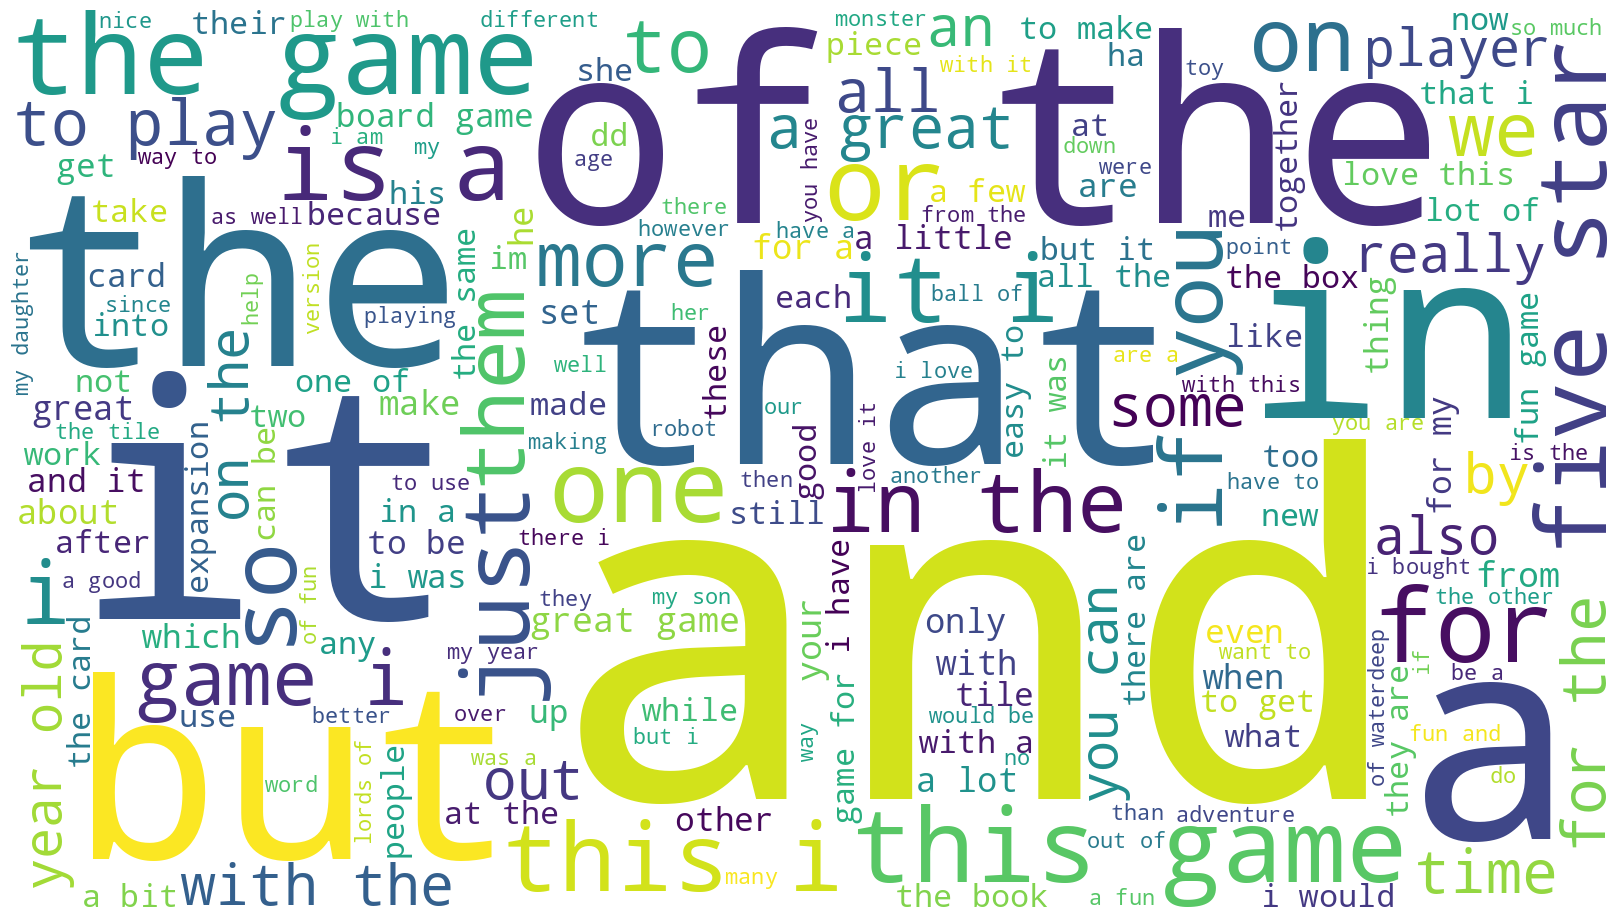

In [ ]:
# Create a copy of the DataFrame
df5_copy = df5.copy()

# Combine all reviews into a single string
text = " ".join(review for review in df5_copy.review_summ)

# Generate word cloud without removing Stopwords
wordcloud = WordCloud(width=1600, height=900,
                      background_color='white',
                      stopwords='none',
                      min_font_size=8).generate(text)

# Display the generated image:
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Apply tokenisation to review_summ column.
df5_copy['review_summ_tokens'] = df5_copy['review_summ'].apply(word_tokenize)

# View DataFrame.
df5_copy['review_summ_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_summ_tokens, dtype: object

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Create frequency distribution
fdist = FreqDist(word for review in df5_copy['review_summ_tokens'] for word in review)

# Print frequency distribution
fdist

FreqDist({'the': 5712, 'and': 3401, 'a': 3400, 'to': 3354, 'of': 2627, 'it': 2233, 'i': 2176, 'game': 1990, 'this': 1911, 'is': 1885, ...})

### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Create a set of English stopwords
en_stopwords = set(stopwords.words('english'))

# Function to remove stopwords and non-alphabets/non-numeric
def remove_stopwords_and_non_alphanumeric(tokens):
    return [word for word in tokens if word.isalnum() and word not in en_stopwords]

df5_copy['review_summ_tokens'] = df5_copy['review_summ_tokens']\
                                 .apply(remove_stopwords_and_non_alphanumeric)
df5_copy['review_summ_tokens'].head()

0    [comes, dms, screen, space, screen, absolute, ...
1    [open, letter, galeforce9, unpainted, miniatur...
2    [nice, art, nice, printing, two, panels, fille...
3    [amazing, buy, bought, gift, new, dm, perfect,...
4    [review, gf9s, previous, screens, completely, ...
Name: review_summ_tokens, dtype: object

### 4c) Create wordcloud without stopwords

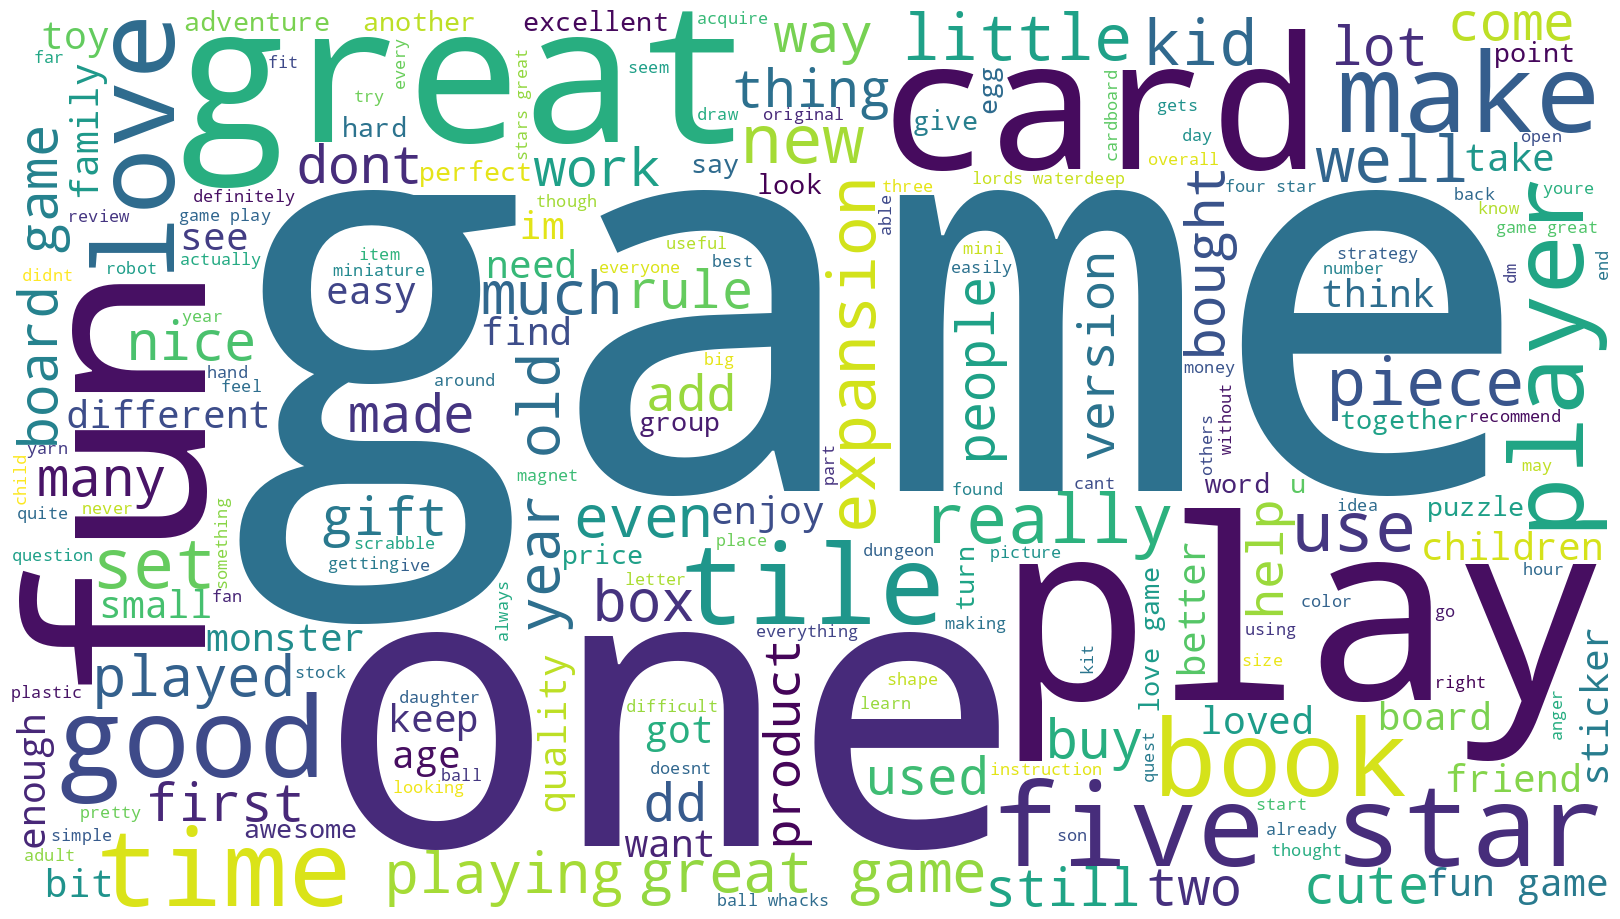

In [ ]:
# Combine all tokens into a single string
all_tokens = " ".join(word for review in df5_copy['review_summ_tokens'] for word in review)

# Generate the word cloud
wordcloud1 = WordCloud(width=1600, height=900,
                       background_color="white",
                       min_font_size=8).generate(all_tokens)

# Display the generated image:
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 4d) Identify 15 most common words and polarity

In [ ]:
# Create frequency distribution
fdist1 = FreqDist(all_tokens.split())

# Print frequency distribution
fdist1

FreqDist({'game': 1990, 'great': 875, 'fun': 770, 'one': 568, 'play': 528, 'like': 468, 'stars': 464, 'love': 416, 'good': 381, 'five': 362, ...})

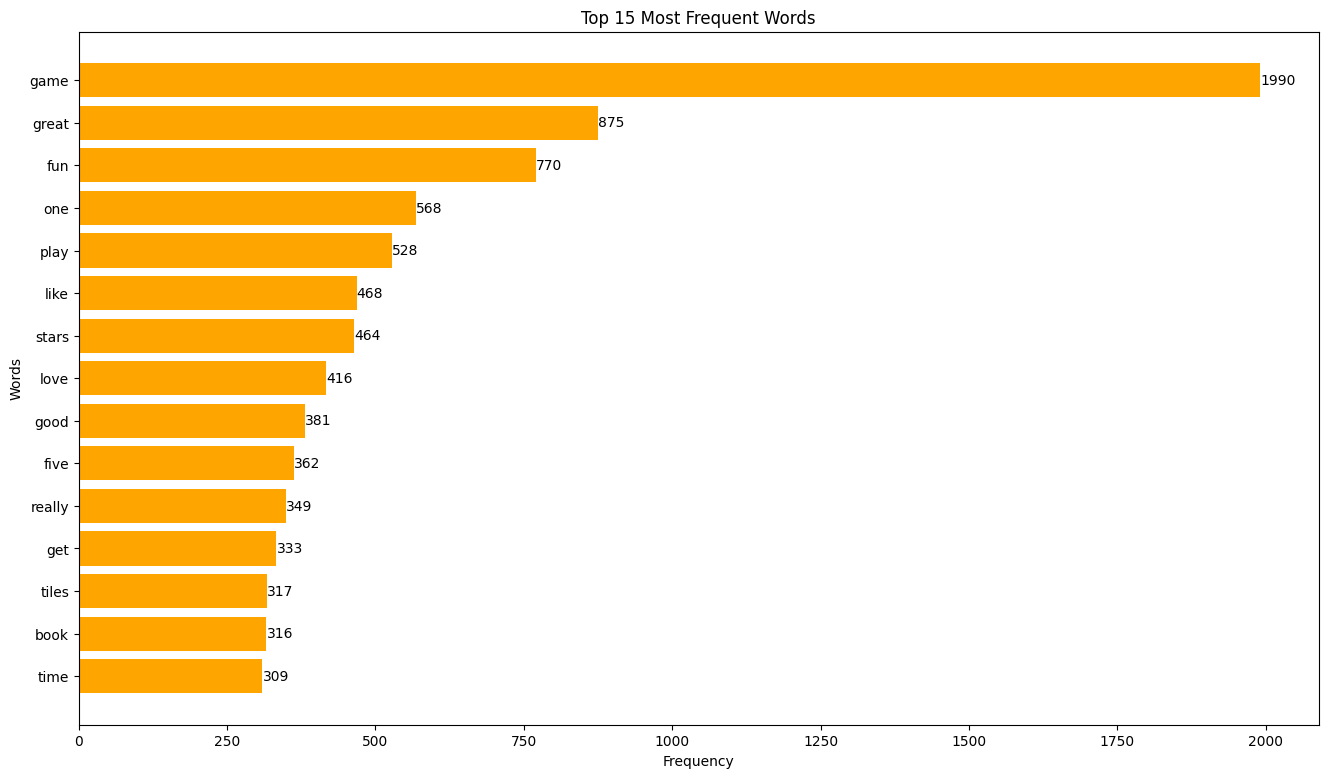

In [ ]:
# Determine the top 15 most frequently used words
top_15_words = fdist1.most_common(15)
words = [word for word, freq in top_15_words]
freqs = [freq for word, freq in top_15_words]

# Plot it in a horizontal bar plot in a descending order of its frequency
plt.figure(figsize=(16, 9))
plt.barh(words, freqs, color='orange')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 15 Most Frequent Words')
for i, v in enumerate(freqs):
    plt.text(v + 0.5, i, str(v), color='black', va='center') # Add frequency labels to bars
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Determine polarity and subjectivity of review_summ.
df5_copy['polarity'] = df5_copy['review_summ']\
                       .apply(lambda x: TextBlob(x).sentiment.polarity)

df5_copy['subjectivity'] = df5_copy['review_summ']\
                           .apply(lambda x: TextBlob(x).sentiment.subjectivity)
# View output.
df5_copy[['polarity','subjectivity']].head()

polarity  subjectivity
0 -0.002273      0.488636
1 -0.003855      0.464739
2  0.109033      0.450189
3  0.578788      0.784848
4 -0.316667      0.316667

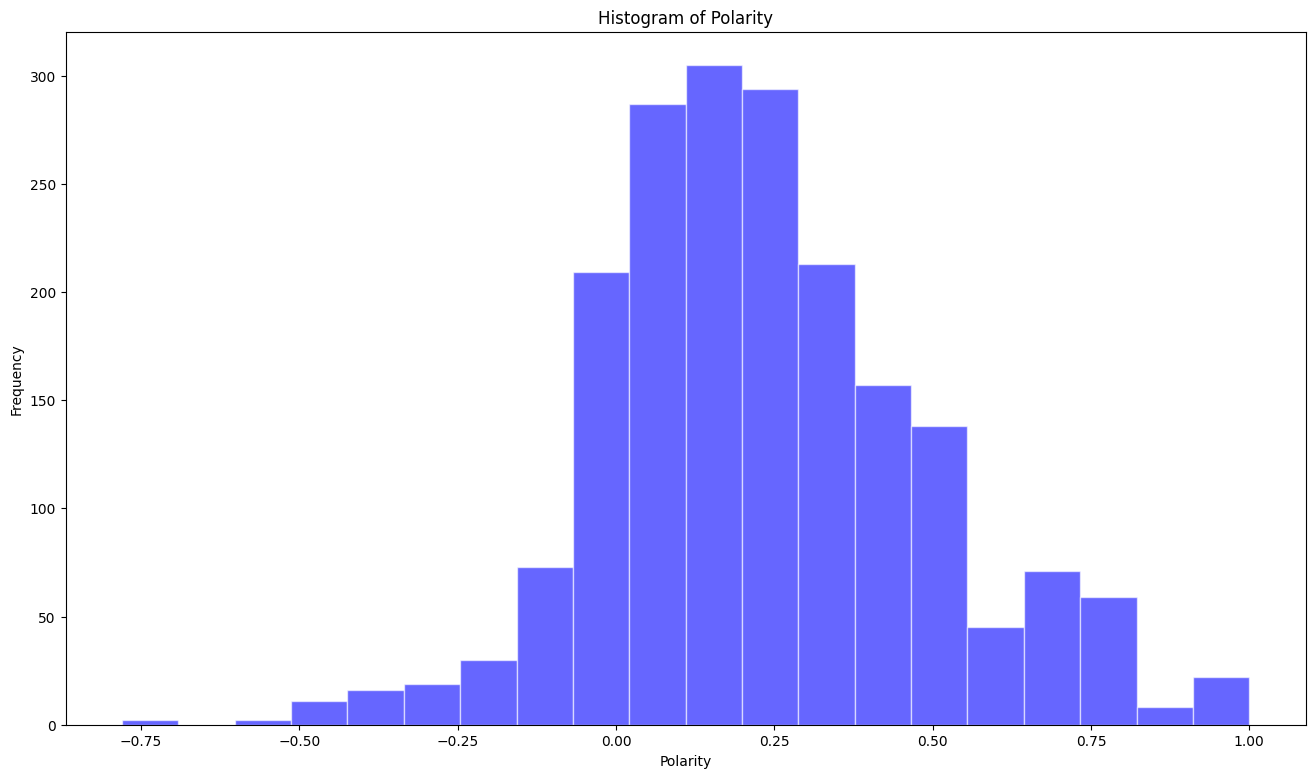

In [ ]:
# Plot histograms of polarity
plt.figure(figsize=(16, 9))
plt.hist(df5_copy['polarity'], bins=20, color='blue', edgecolor='white', alpha=0.6)
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Histogram of Polarity')
plt.savefig('Histogram_Polarity.png', dpi=300, bbox_inches='tight')
plt.show()

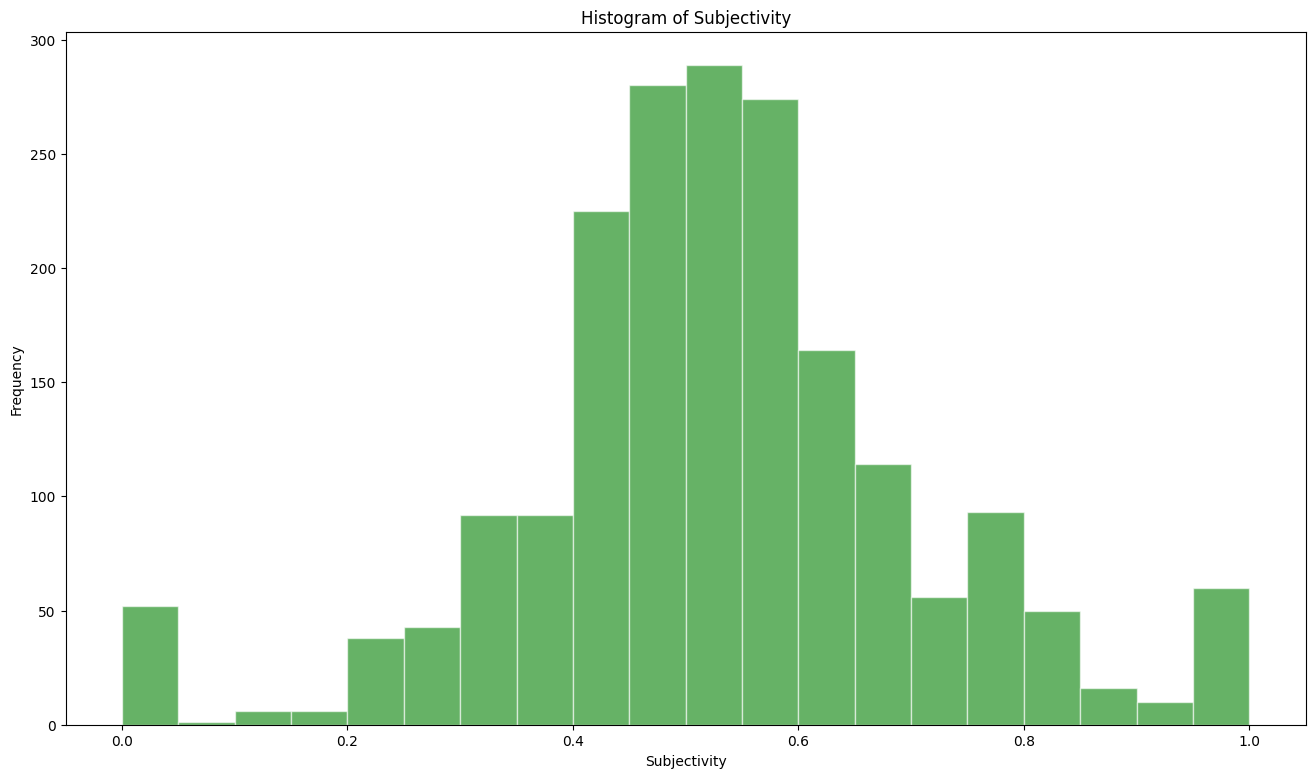

In [ ]:
# Plot histograms of subjectivity
plt.figure(figsize=(16, 9))
plt.hist(df5_copy['subjectivity'], bins=20, color='green', edgecolor='white', alpha=0.6)
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.title('Histogram of Subjectivity')
plt.show()


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# What are the top 20 Positive reviews
top_20_positive = df5_copy.sort_values(by='polarity', ascending=False).head(20)

print('Top 20 Positive Reviews:\n')
top_20_positive[['review', 'summary', 'polarity']]\
                .style.set_properties(subset=['review'],
                                      **{'width': '600px'})

Top 20 Positive Reviews:



In [ ]:
# What are the top 20 Negative reviews
top_20_negative = df5_copy.sort_values(by='polarity', ascending=True).head(20)

print('Top 20 Negative Reviews:\n')
top_20_negative[['review', 'summary', 'polarity']]\
                .style.set_properties(subset=['review'],
                                      **{'width': '900px'})

Top 20 Negative Reviews:



In [ ]:
# Applying Vader Sentiment analyzer to Review column

from nltk.corpus import words

# 1. Convert review column to lowercase
df5_copy['review_clean'] = df5_copy['review'].str.lower()

# 2. Remove stop words
# 3. Retain only English words, alphabets and numbers - removes Punctuation
# 4. Check for duplicates
en_stopwords = set(stopwords.words('english'))
en_words = set(words.words())

def clean_text(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.isalnum() and
                      word not in en_stopwords and
                      word in en_words]
    return " ".join(cleaned_tokens)

df5_copy['review_clean'] = df5_copy['review_clean'].apply(clean_text)

#Check for duplicates
print("Number of duplicates:", df5_copy['review_clean'].duplicated().sum())
df5_copy['review_clean'].head()

Number of duplicates: 68


0    comes screen space screen absolute premium fac...
1    open letter unpainted bad spell great board ho...
2    nice art nice printing two filled general forg...
3                  amazing buy bought gift new perfect
4    review previous completely unnecessary nearly ...
Name: review_clean, dtype: object

In [ ]:
# Drop duplicates in 'review_clean' column
df5_copy.drop_duplicates(subset=['review_clean'], inplace=True)

# Check the shape of the DataFrame after removing duplicates
print("DataFrame shape after removing duplicates:", df5_copy.shape)

DataFrame shape after removing duplicates: (1893, 8)


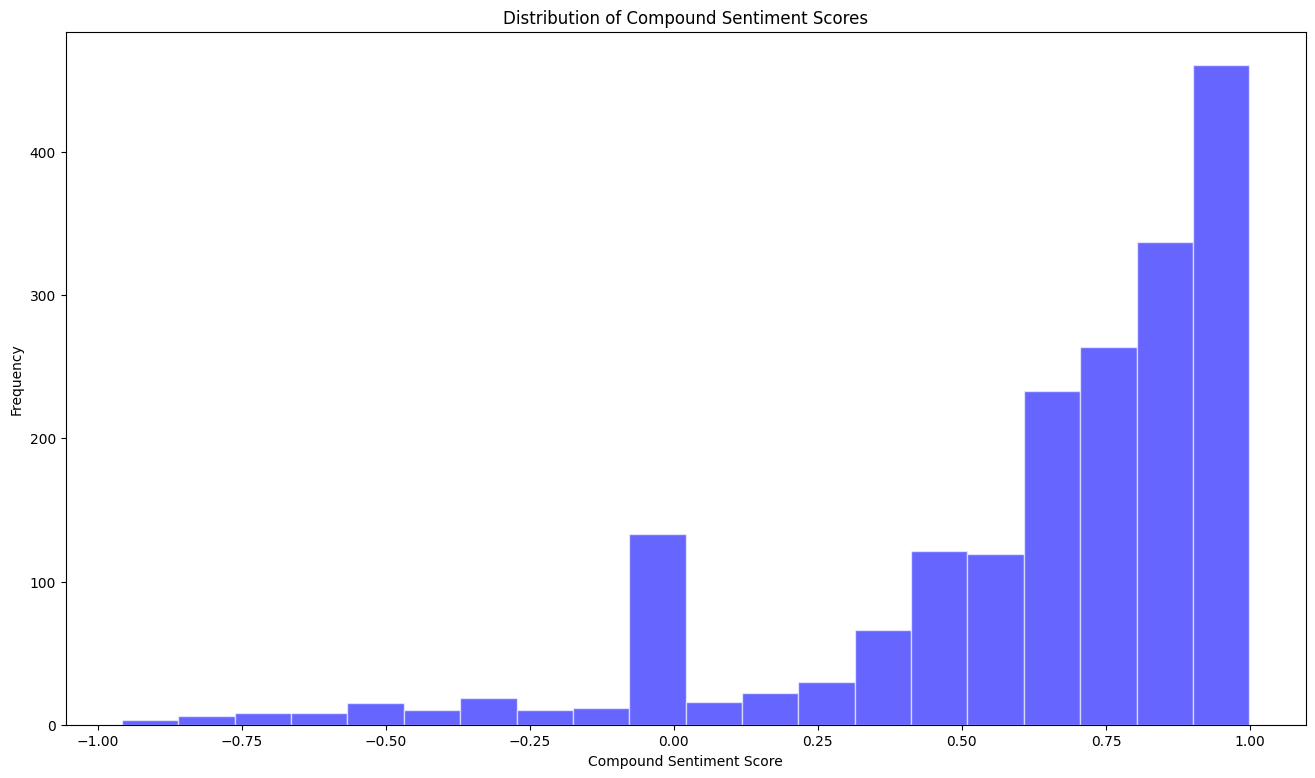

In [ ]:
# 6. Apply sentiment analyser
analyzer = SentimentIntensityAnalyzer()
df5_copy['compound'] = df5_copy['review_clean'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df5_copy['pos'] = df5_copy['review_clean'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df5_copy['neu'] = df5_copy['review_clean'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
df5_copy['neg'] = df5_copy['review_clean'].apply(lambda x: analyzer.polarity_scores(x)['neg'])

# 7. Plot histogram of compound scores
plt.figure(figsize=(16, 9))
plt.hist(df5_copy['compound'], bins=20, color='blue', edgecolor='white', alpha=0.6)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores')
plt.savefig('Histogram_CompoundSentiment_Vader.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Top 20 Positive reviews with their polarity and compound scores

# Sort by pos score in descending order to get the most positive
top_20_positive_reviews = df5_copy.sort_values(by='pos', ascending=False).head(20)

# Display the top 20 positive reviews with scores rounded to two decimal places
print("Top 20 Positive Reviews based on Highest Positive Sentiment:\n")
top_20_positive_reviews[['review', 'summary',
                         'pos', 'neu', 'neg', 'compound']].round(2)\
                         .style.set_properties(subset=['review','summary'],
                                               **{'width': '500px'})

Top 20 Positive Reviews based on Highest Positive Sentiment:



In [ ]:
# Top 20 Negative reviews with their polarity and compound scores.

# Sort by neg score in ascending order to get the most negative
top_20_negative_reviews = df5_copy.sort_values(by='neg', ascending=False).head(20)

# Display the top 20 negative reviews with scores rounded to two decimal places
print("Top 20 Negative Reviews based on Highest Negative Sentiment:\n")
top_20_negative_reviews[['review', 'summary',
                         'pos', 'neu', 'neg', 'compound']].round(2)\
                         .style.set_properties(subset=['review','summary'],
                                               **{'width': '900px'})

Top 20 Negative Reviews based on Highest Negative Sentiment:



## 7. Discuss: Insights and observations

**Process**
The implemented NLP process encompassed data acquisition, preprocessing, frequency analysis, and sentiment analysis. This approach facilitated the extraction of valuable information from customer reviews, including frequently used words and the identification of positive and negative sentiments. These insights provide valuable input to the marketing department for understanding customer opinions and preferences, informing future campaign strategies.

Here's a breakdown of key findings based on the code and outputs:
1. **Most Frequent Words:**
 - **Top Words:** The 15 most frequent
words, after preprocessing and stemming, include "game," "play," "fun," "great," "good," "love," "excel," "product," "time," "buy," "get," "like," "one".
 - **Focus on Gameplay and Enjoyment:** The dominance of words like "game," "play," and "fun" highlights the importance of gameplay experience in customer reviews.
 - **Positive Sentiment:** Words like "great," "good," and "love" suggest a generally positive sentiment towards the products.
 - **Product Quality:** The inclusion of "excel" and "product" indicates that customers also value product quality.
 - **Potential Marketing Keywords:** These frequent words could be used as keywords in marketing campaigns to resonate with customer interests.

2. **Top Positive Reviews:**
 - **Highly Positive Language:** Positive reviews often contain enthusiastic expressions like "love it," "awesome game," "highly recommend," and "best game ever."
 - **Specific Product Features:** Some reviews praise specific features or aspects of the games, such as graphics, storyline, or gameplay mechanics.
 - **Value for Money:** Positive reviews occasionally mention the product being worth the price or offering good value.
 - **Targeted Marketing:** Analyzing these positive reviews can help identify key selling points for specific products and target marketing messages accordingly.
3. **Top Negative Reviews:**
 - **Critical Feedback:** Negative reviews express dissatisfaction using phrases like "disappointed," "waste of money," "boring," and "not worth it."
 - **Technical Issues:** Some negative reviews report bugs, glitches, or performance problems.
 - **Lack of Content:** Certain reviews criticize the game's length, replayability, or overall content.
 - **Customer Service:** Occasionally, negative reviews mention poor customer service experiences.
 - **Areas for Improvement:** These negative reviews can help pinpoint product weaknesses, areas for improvement, and potential issues to address in marketing materials.
4. **Overall Sentiment:**
 - **Mostly Positive:** While there are negative reviews, the overall sentiment expressed in the reviews appears to be predominantly positive.
 - It appears from the histogram that the customer reviews have a positive sentiment polarity, as the distribution is skewed to the right side (peaked towards positive polarity range)
 - The highest frequency bar is in the positive polarity range with polarity scores between 0.0 to 0.5. This suggests that most of the reviews express a positive or slightly positive sentiment.
 - **Potential for Improvement:** Despite positive feedback, the presence of negative reviews suggests opportunities for improvement in product quality, customer service, and addressing customer expectations.

**Insights and Recommendations:**
 - **Leverage Positive Feedback:** Highlight positive customer experiences and product features in marketing campaigns.
 - **Address Negative Feedback:** Identify and address recurring negative comments to improve product quality and customer service.
 - **Focus on Gameplay:** Continue emphasizing gameplay and enjoyment as key factors in marketing messages.
 - **Target Specific Audiences:** Utilise insights from positive reviews to tailor marketing efforts towards specific customer segments.


In [ ]:
# Determine correlation between loyalty points, polarity, pos, neu, neg and compound score

# Calculate the correlation matrix
correlation_matrix = df5_copy[['loyalty_points', 'polarity', 'pos', 'neu', 'neg', 'compound']].corr()

# Display the correlation matrix
correlation_matrix

loyalty_points  polarity       pos       neu       neg  \
loyalty_points        1.000000  0.010175 -0.015744  0.006429  0.021266   
polarity              0.010175  1.000000  0.489303 -0.355631 -0.400899   
pos                  -0.015744  0.489303  1.000000 -0.910750 -0.360032   
neu                   0.006429 -0.355631 -0.910750  1.000000 -0.044131   
neg                   0.021266 -0.400899 -0.360032 -0.044131  1.000000   
compound             -0.020097  0.288558  0.526811 -0.351589 -0.483145   

                compound  
loyalty_points -0.020097  
polarity        0.288558  
pos             0.526811  
neu            -0.351589  
neg            -0.483145  
compound        1.000000

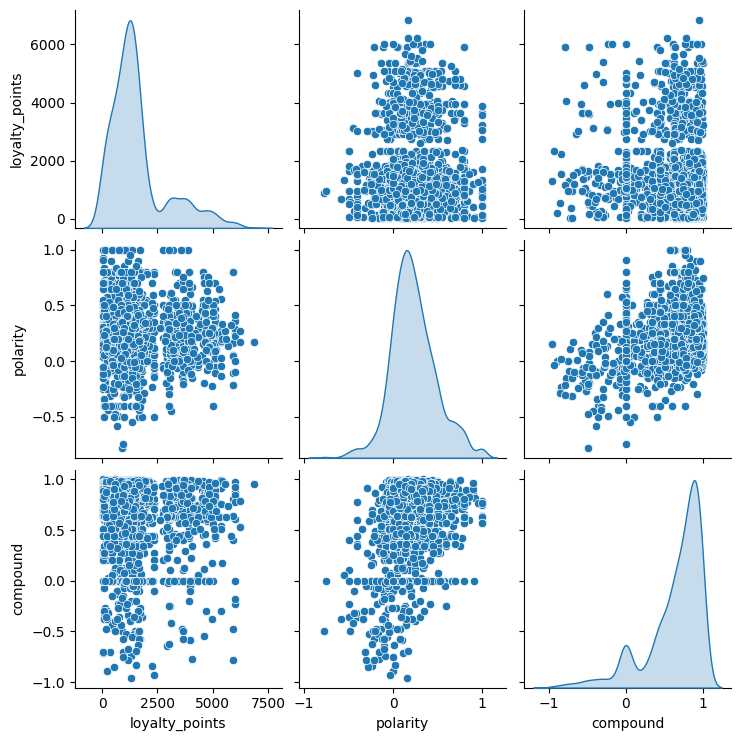

In [ ]:
# Select relevant columns for the pair plot
columns_for_plot = ['loyalty_points', 'polarity', 'compound']
df_plot = df5_copy[columns_for_plot]

# Create the pair plot with histograms on the diagonal
sns.pairplot(df_plot, diag_kind='kde')
plt.savefig('Pairplot_LoyaltyPoints_Polarity_Compound.png', dpi=300, bbox_inches='tight')
plt.show()

**Observation**
No specific linear correlation or causation observed between sentiment scores (Textblob Polarity or Vader Compound) and Loyalty points in the data set